Creating initial model.
[(0, 16, 11), (0, 17, 11), (0, 18, 11), (1, 11, 11), (1, 12, 11)]
Alarm: Concept drift detected
------------------------------------------------------------ di 0.07796770177693879 -50.00205755989653 0.001
[(0, 18, 11)]
match_percentage:  1.0
Matching model found. Reusing the model.
Alarm: Concept drift detected
------------------------------------------------------------ di 1.18298417171273 50.74101905567357 0.0001690265493518861
[(0, 18, 11), (2, 7, 10), (3, 3, 12), (4, 0, 12), (4, 0, 13), (4, 0, 14), (4, 1, 13), (4, 2, 12), (4, 2, 13), (4, 7, 6), (5, 0, 10), (5, 0, 11), (5, 0, 12), (5, 1, 9), (5, 1, 10), (5, 2, 10), (6, 0, 8), (6, 0, 9), (6, 1, 8)]
match_percentage:  0.05263157894736842
19
Alarm: Concept drift detected
------------------------------------------------------------ di 1.7883929158715393 50.336718373387065 0.001
[(2, 7, 10), (4, 0, 13), (4, 0, 14), (4, 1, 13), (4, 1, 14), (4, 2, 13), (6, 5, 15), (15, 11, 15), (15, 11, 16), (16, 19, 13), (17, 13, 1

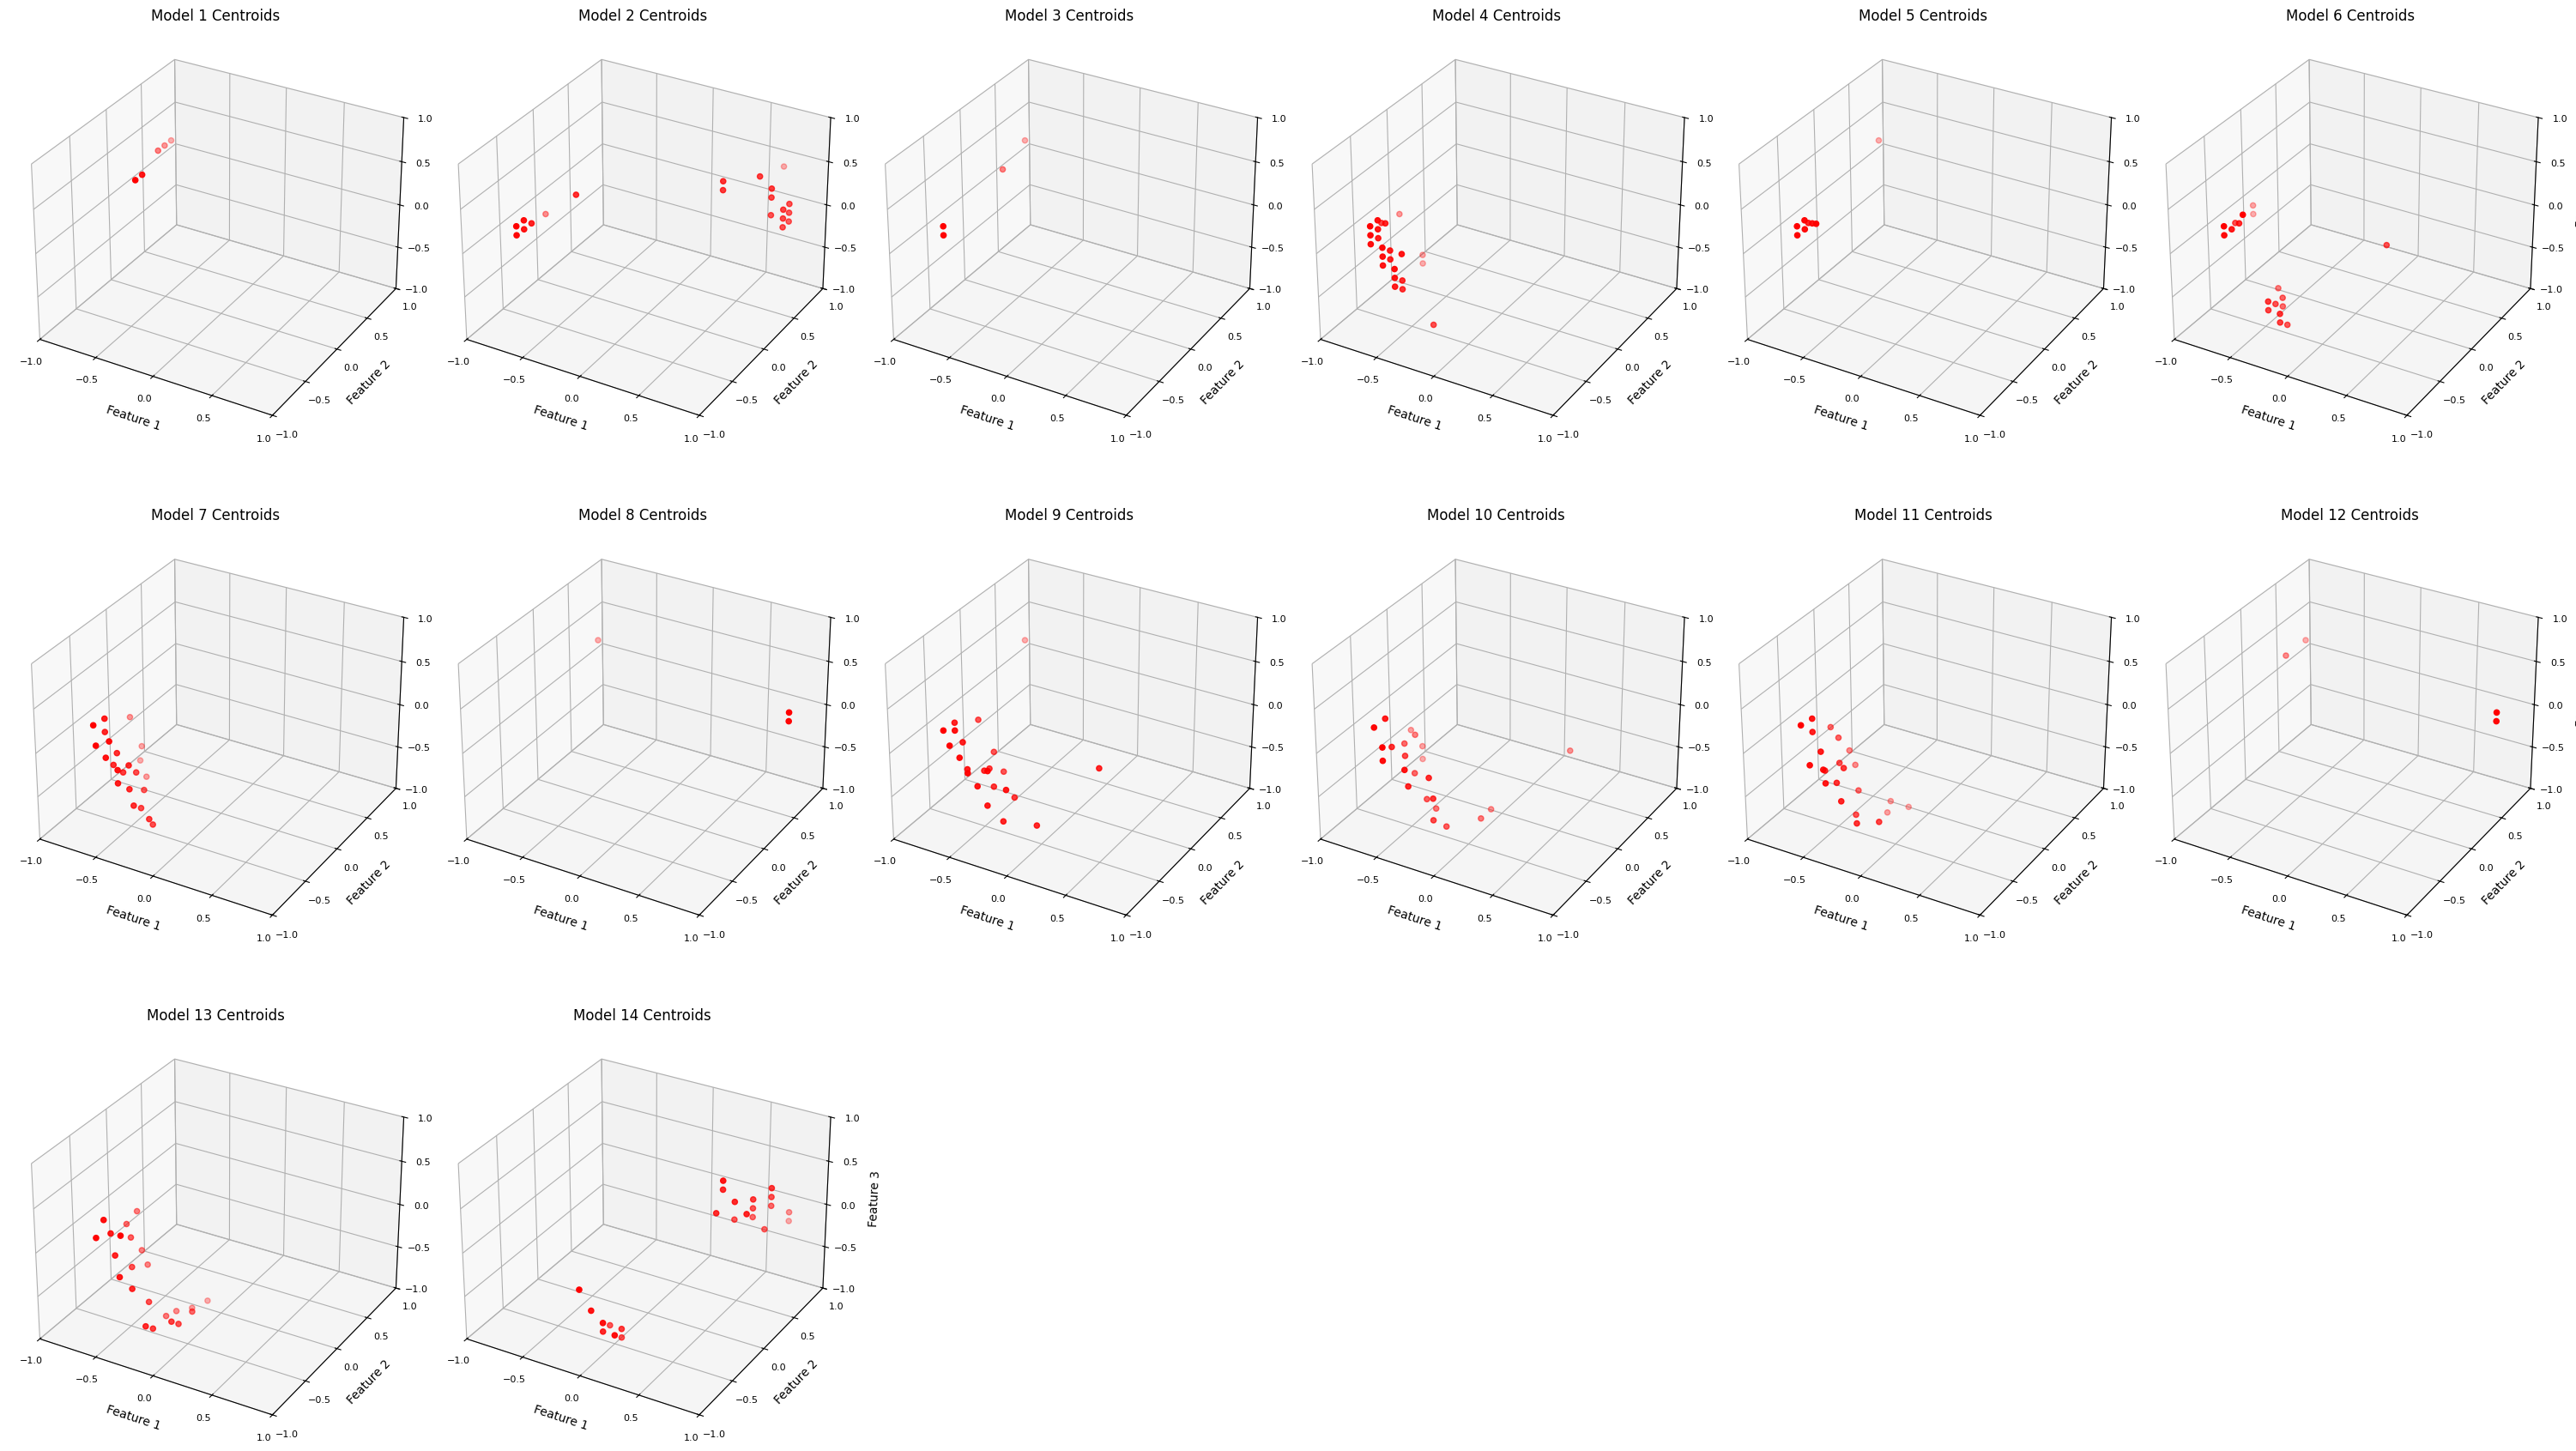

[-0.95  0.65  0.15]
[-0.95  0.75  0.15]
[-0.95  0.85  0.15]
[-0.85  0.15  0.15]
[-0.85  0.25  0.15]
[-0.75 -0.25  0.05]
[-0.55 -0.95  0.35]
[-0.55 -0.95  0.45]
[-0.55 -0.85  0.35]
[-0.55 -0.85  0.45]
[-0.55 -0.75  0.35]
[-0.35 -0.45  0.55]
[0.55 0.15 0.55]
[0.55 0.15 0.65]
[0.65 0.95 0.35]
[0.75 0.35 0.65]
[0.85 0.35 0.25]
[0.85 0.35 0.45]
[0.85 0.35 0.55]
[0.95 0.35 0.15]
[0.95 0.35 0.25]
[0.95 0.35 0.35]
[0.95 0.45 0.15]
[0.95 0.45 0.25]
[0.95 0.45 0.35]
[-0.95  0.85  0.15]
[-0.85  0.35  0.15]
[-0.55 -0.95  0.35]
[-0.55 -0.95  0.45]
[-0.75 -0.25  0.05]
[-0.65 -0.65  0.25]
[-0.55 -0.95  0.25]
[-0.55 -0.95  0.35]
[-0.55 -0.95  0.45]
[-0.55 -0.85  0.25]
[-0.55 -0.85  0.35]
[-0.55 -0.85  0.45]
[-0.55 -0.75  0.35]
[-0.55 -0.25 -0.45]
[-0.55 -0.25 -0.35]
[-0.45 -0.95  0.05]
[-0.45 -0.95  0.15]
[-0.45 -0.95  0.25]
[-0.45 -0.85  0.05]
[-0.45 -0.85  0.15]
[-0.35 -0.95 -0.15]
[-0.35 -0.95 -0.05]
[-0.35 -0.95  0.05]
[-0.35 -0.85 -0.25]
[-0.35 -0.85 -0.15]
[-0.35 -0.85  0.15]
[-0.15 -0.75 -0.65]

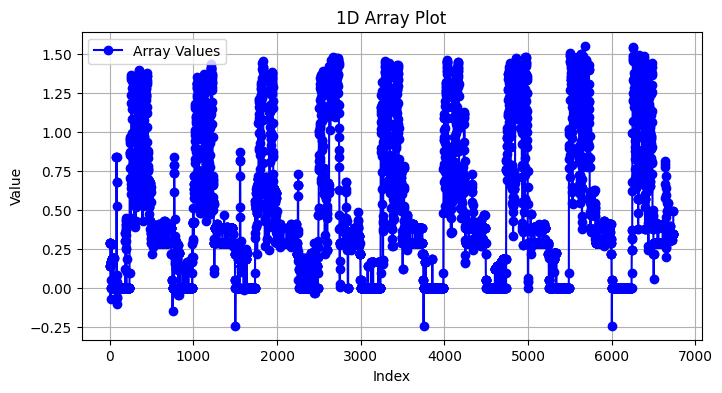

In [2]:
import csv

import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn import preprocessing

class Preprocessing:
    def __init__(self, file_path):
        self.filename = file_path
        self.data = pd.read_csv(self.filename)
        self.correlation_threshold = 0.5
        self.attribute_size = 42
        self.column_name = []

    def categorical_to_numerical(self): # using label encoding method
        for column in ['protocol_type', 'service', 'flag', 'label']:
            self.data[column] = self.data[column].astype('category')
            self.data[column] = self.data[column].cat.codes
        self.data.fillna(0)

    def filter_method(self): #dimention reduction
        cor = self.data.corr()
        cor_column = abs(cor['label']).tolist()
        column_index = 0
        for column in self.data.columns: # selecting relative features
            self.column_name.append(column)
            if cor_column[column_index] < self.correlation_threshold:
                self.data.drop(column, axis=1, inplace=True)
                self.column_name.remove(column)
            column_index += 1
        for i in range(len(self.data.columns)):
            for j in range(i+1, len(self.data.columns)):
                cor_column = abs(cor[self.data.columns[i]]).tolist()
                if abs(cor_column[j]) > self.correlation_threshold:
                    self.data.drop(self.data.columns[i], axis=1, inplace=True)
                    self.column_name.remove(self.data.columns[i])

    def standardization(self):
        scaler = preprocessing.StandardScaler().fit(self.data)
        self.data = scaler.transform(self.data)

    def run(self):
        label_names = self.data["label"]
        self.categorical_to_numerical()
        self.filter_method()
        # self.standardization()
        # self.data = self.data.tolist()
        # self.attribute_size = len(self.data[0])
        return self.data, label_names


import numpy as np
from sklearn.cluster import KMeans
from collections import deque
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import random
import math



# from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_information_score, davies_bouldin_score


class MicroCluster:
    def __init__(self, centroid, radius, count=1):
        self.centroid = np.array(centroid)
        self.radius = radius
        self.count = count

    def update(self, point):
        # Incrementally update the centroid and radius
        self.count += 1
        old_centroid = self.centroid.copy()
        self.centroid = (self.centroid * (self.count - 1) + point) / self.count
        # self.radius = np.linalg.norm(self.centroid - old_centroid)  # Do not update the radius


class Model:
    def __init__(self, clusters=None):
        if clusters is None:
            clusters = []
        self.clusters = clusters


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module
from scipy.spatial.distance import cdist

# Generate some sample data
np.random.seed(0)
data = np.random.rand(1000, 3)  # 1000 data points in 3 dimensions




def box_counting_dimension(grid, min_box_size, density_threshold):
    """
    Estimates the Hausdorff fractal dimension of a 3D grid using the box-counting method,
    and plots both the raw and logarithmic scales of box sizes and counts.

    :param grid: 3D numpy array representing density in the grid.
    :param min_box_size: Minimum box size to start counting. Must be a power of 2 and > 1.
    :return: Estimated fractal dimension.
    """
    assert grid.ndim == 3, "Input grid must be 3-dimensional"
    assert np.any(grid), "Grid must contain some non-zero values"

    size = max(grid.shape)
    box_sizes = []
    counts = []

    # Dynamically adjust box sizes based on grid size
    box_size = min_box_size
    while box_size <= size:
        count = 0
        for x in range(0, size, box_size):
            for y in range(0, size, box_size):
                for z in range(0, size, box_size):
                    if np.sum(grid[x:x + box_size, y:y + box_size, z:z + box_size]) > density_threshold:
                        count += 1
        box_sizes.append(box_size)
        counts.append(count)
        # box_size *= 2
        box_size += 1

    log_box_sizes = np.log(1 / np.array(box_sizes))
    log_counts = np.log(np.array(counts))

    slope, intercept = np.polyfit(log_box_sizes, log_counts, 1)



    # plt.figure(figsize=(14, 6))

    # # Plot the raw box_sizes vs. counts
    # plt.subplot(1, 2, 1)
    # plt.plot(box_sizes, counts, 'o-', label='Raw Data Points')
    # plt.xlabel('Box Size')
    # plt.ylabel('Count')
    # plt.title('Box Size vs. Count')
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.grid(True)
    # plt.legend()

    # # Plot log_box_sizes vs. log_counts
    # plt.subplot(1, 2, 2)
    # plt.plot(log_box_sizes, log_counts, 'o-', label='Log Data Points')
    # plt.plot(log_box_sizes, slope * log_box_sizes + intercept, 'r--', label=f'Fit Line: Slope = {slope:.2f}')
    # plt.xlabel('Log(1 / Box Size)')
    # plt.ylabel('Log(Count)')
    # plt.title('Log-Log Plot for Fractal Dimension Calculation')
    # plt.legend()
    # plt.grid(True)

    # plt.tight_layout()
    # plt.show()

    
    return slope






def initialize_grid_manager(x_min, x_max, y_min, y_max, z_min, z_max, grid_size):
    """Initialize grid_manager as a 3D NumPy array to represent the cube grid."""
    
    # Calculate the number of grid cells along each axis
    x_bins = np.arange(x_min, x_max, grid_size)
    y_bins = np.arange(y_min, y_max, grid_size)
    z_bins = np.arange(z_min, z_max, grid_size)

    # Create a 3D numpy array for the grid manager, initialized to zeros
    grid_shape = (len(x_bins), len(y_bins), len(z_bins))
    grid_manager = np.zeros(grid_shape)  # Initialize with zeros

    return grid_manager




def update_grid(grid_manager, point, grid_size, decay_factor):
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    z_min, z_max = -1, 1
    x_bins = np.arange(x_min, x_max, grid_size)
    y_bins = np.arange(y_min, y_max, grid_size)
    z_bins = np.arange(z_min, z_max, grid_size)

    x_index = np.digitize(point[0], x_bins) - 1
    y_index = np.digitize(point[1], y_bins) - 1
    z_index = np.digitize(point[2], z_bins) - 1
    grid_key = (x_index, y_index, z_index)

    grid_manager *= decay_factor
    grid_manager[x_index, y_index, z_index] += 1

    return grid_manager

    

def micro_clustering(grid_manager, grid_size, density_threshold, decay_factor, cluster__max_numbers=23):
    # Randomly sample 50 data points from the dataset
    # sample_size = data.shape[0]
    # # sample_indices = np.random.choice(data.shape[0], sample_size, replace=False)
    # # sampled_data = data[sample_indices]
    # sampled_data = data

    # Parameters for grid-based clustering
    grid_size = grid_size  # Smaller grid size for more granular clustering
    density_threshold = density_threshold  # Threshold adjusted for small samples

    # Create grid
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    z_min, z_max = -1, 1
    x_bins = np.arange(x_min, x_max, grid_size)
    y_bins = np.arange(y_min, y_max, grid_size)
    z_bins = np.arange(z_min, z_max, grid_size)


    updated_keys = set()
    decay_factor = decay_factor  # Example decay factor
    
    
    # Identify clusters
    # for i in grid_manager.items():
    #     print(i[1].density, end= ", ")
    # print("")
    clusters = []

    # Iterate over all cells in the 3D grid and check density values
    it = np.nditer(grid_manager, flags=['multi_index'])
    for cell in it:
        if cell >= density_threshold:
            clusters.append(it.multi_index)

    print(clusters)
    # print(clusters)
    # print(grid)
    cluster_centers = [
        (x_bins[coord[0]] + grid_size / 2, y_bins[coord[1]] + grid_size / 2, z_bins[coord[2]] + grid_size / 2) for coord
        in clusters]

    # Merge clusters to achieve exactly 5 clusters
    while len(cluster_centers) > cluster__max_numbers:
        distances = cdist(cluster_centers, cluster_centers)
        np.fill_diagonal(distances, np.inf)

        closest_pair = np.unravel_index(np.argmin(distances), distances.shape)
        new_center = np.mean([cluster_centers[closest_pair[0]], cluster_centers[closest_pair[1]]], axis=0)

        cluster_centers.pop(max(closest_pair))
        cluster_centers.pop(min(closest_pair))
        cluster_centers.append(tuple(new_center))
    # print("the numbers of clusters", len(cluster_centers), "sample size ", sample_size)
    return cluster_centers



import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist

def micro_clustering_DBScan(data, sample_size=50, eps=0.1, min_samples=5, cluster__max_numbers=23):
    data = data[:, :-1]
    # Sample data points if sample_size is less than the total number of data points
    sample_size = data.shape[0]
    sample_indices = np.random.choice(data.shape[0], sample_size, replace=False)
    sampled_data = data[sample_indices]


    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(sampled_data)

    # Extract cluster centers by calculating the mean of points in each cluster
    cluster_centers = []
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            # Skip noise points (label == -1)
            continue
        cluster_points = sampled_data[labels == label]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)

    # If there are more clusters than desired, merge clusters
    while len(cluster_centers) > cluster__max_numbers:
        distances = cdist(cluster_centers, cluster_centers)
        np.fill_diagonal(distances, np.inf)

        closest_pair = np.unravel_index(np.argmin(distances), distances.shape)
        new_center = np.mean([cluster_centers[closest_pair[0]], cluster_centers[closest_pair[1]]], axis=0)

        cluster_centers.pop(max(closest_pair))
        cluster_centers.pop(min(closest_pair))
        cluster_centers.append(new_center)
    return cluster_centers



def find_matching_model(grid_manager, grid_size, density_threshold, models, percentage_threshold=0.95, ):

    grid_size = grid_size  # Smaller grid size for more granular clustering
    density_threshold = density_threshold  # Threshold adjusted for small samples

    # Create grid
    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    z_min, z_max = -1, 1
    x_bins = np.arange(x_min, x_max, grid_size)
    y_bins = np.arange(y_min, y_max, grid_size)
    z_bins = np.arange(z_min, z_max, grid_size)


    clusters = []

    # Iterate over all cells in the 3D grid and check density values
    it = np.nditer(grid_manager, flags=['multi_index'])
    for cell in it:
        if cell >= density_threshold:
            clusters.append(it.multi_index)

    print(clusters)
    # print(clusters)
    # print(grid)
    cluster_centers = [
        (x_bins[coord[0]] + grid_size / 2, y_bins[coord[1]] + grid_size / 2, z_bins[coord[2]] + grid_size / 2) for coord
        in clusters]







    best_model = None
    max_match_percentage = 0
    min_total_error = float('inf')
    flag = -1
    best_model_index = 0

    for model in models:
        flag+=1
        max_match_percentage = percentage_threshold
        match_count = 0
        total_error = 0
        for sample in cluster_centers:
            closest_cluster = min(model.clusters, key=lambda cluster: np.linalg.norm(cluster.centroid - sample))
            distance = np.linalg.norm(closest_cluster.centroid - sample)
            if distance <= closest_cluster.radius:
                match_count += 1
            total_error += distance

        match_percentage = match_count / len(cluster_centers)
        print("match_percentage: ", match_percentage)
        if match_percentage > max_match_percentage:
            max_match_percentage = match_percentage
            best_model = model
            best_model_index = flag
            min_total_error = total_error
        elif match_percentage == max_match_percentage and total_error < min_total_error:
            best_model = model
            best_model_index = flag
            min_total_error = total_error

    return best_model , best_model_index




# class PageHinkley:
#     def __init__(self, delta=0.005, lambda_=30, alpha=0.99):
#         self.delta = delta
#         self.lambda_ = lambda_
#         self.alpha = alpha
#         self.cum_sum = 0
#         self.min_cum_sum = 0
#         self.m = 0
#         self.t = 0

#     def update(self, value):
#         self.t += 1
#         self.m = self.alpha * self.m + (1 - self.alpha) * value
#         self.cum_sum += value - self.m - self.delta
#         # print(self.cum_sum, self.min_cum_sum, self.cum_sum - self.min_cum_sum, self.lambda_)
#         if self.cum_sum < self.min_cum_sum:
#             self.min_cum_sum = self.cum_sum

#         if self.cum_sum - self.min_cum_sum > self.lambda_:

#             self.reset()
#             return True
#         return False

#     def reset(self):
#         self.cum_sum = 0
#         self.min_cum_sum = 0
#         self.m = 0
#         self.t = 0


class PageHinkley:
    def __init__(self, delta=0.005, lambda_W=50, lambda_A=100, warm_up_period=100, alpha=1 - 0.0001):
        self.delta = delta
        self.lambda_W = lambda_W
        self.lambda_A = lambda_A
        self.warm_up_period = warm_up_period
        self.reset()
        self.point_count = 0
        self.sum = 0
        self.alpha = alpha
        self.delta = delta
        self.M_T = float('inf')
        self.mean_D_i = 0

    def reset(self):
        self.m_T = 0
        self.M_T = float('inf')
        self.cumulative_sum = []
        self.buffer = []
        self.point_count = 0
        self.mean_D_i = 0

    def update(self, D_i, ):
        self.point_count += 1
        if len(self.cumulative_sum) == 0:
            self.mean_D_i = D_i
        else:
            self.mean_D_i = (self.mean_D_i * len(self.cumulative_sum) + D_i) / (len(self.cumulative_sum) + 1)


        
        deviation = D_i - self.mean_D_i - self.delta
        # deviation = D_i - self.mean_D_i
        # deviation = abs(deviation)
        self.m_T += deviation
        self.cumulative_sum.append(deviation)

        self.M_T = min(abs(self.M_T), abs(self.m_T))

        if self.point_count <= self.warm_up_period:
            return False

        # print(self.m_T, self.M_T, "diffrent: ", self.m_T- self.M_T )
        # print(D_i)
        # print(D_i)

        if abs(self.m_T - self.M_T) > self.lambda_A:
            print("Alarm: Concept drift detected")
            # self.buffer.append(D_i)
            print("------------------------------------------------------------ di", D_i, self.m_T, self.M_T)
            self.reset()
            return "alarm"

        if abs(self.m_T - self.M_T) > self.lambda_W:
            # print("Warning: Possible concept drift detected")
            # self.buffer.append(D_i)
            return "warning"

        return False


def calculate_model_accuracy(data, model):
    # Calculate distances and assign points to the nearest centroid
    clusters_points = {i: [] for i in range(len(model.clusters))}
    for point in data.values:
        distances = [np.linalg.norm(cluster.centroid - point[:-1]) for cluster in model.clusters]
        nearest_cluster_index = np.argmin(distances)
        #  ---------------------------------------------------------------------- inja mishe limit gozasht vaseye distance (outlayer detection)
        clusters_points[nearest_cluster_index].append(point)

    accuracies = []
    correct_count = 0
    total_count = 0

    # Prepare a 3D plot for the clusters
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for cluster_index, points in clusters_points.items():
        if points:
            labels, counts = np.unique([point[-1] for point in points], return_counts=True)
            dominant_label_index = counts.argmax()
            dominant_label = labels[dominant_label_index]
            dominant_label_count = counts[dominant_label_index]
            accuracy = dominant_label_count / len(points)
            accuracies.append(accuracy)

            # cluster_predicted_label = "normal" if label_dict[dominant_label] == "normal" else "attack"
            # for point in points:
            #     true_label = "normal" if label_dict[point[-1]] == "normal" else "attack"
            #     if true_label == cluster_predicted_label:
            #         correct_count += 1  # Count correctly classified points
            
            # # Update total count of points

            correct_count += dominant_label_count
            total_count += len(points)

            for point in points:
                true_label = point[-1]
                color = 'g' if true_label == 0 else 'r'  # Green for normal, Red for attack
                ax.scatter(point[0], point[1], point[2], c=color, alpha=0.6)
            
            # Plot the centroid of the cluster
            centroid = model.clusters[cluster_index].centroid
            ax.scatter(centroid[0], centroid[1], centroid[2], c='blue', marker='x', s=100)  # Blue 'x' for centroids
            
            
            
            print(f"Cluster {cluster_index} Accuracy: {accuracy * 100:.2f}%, Cluster label: {label_dict[dominant_label]}")

    # model_accuracy = np.mean(accuracies) if accuracies else 0
    model_accuracy = correct_count / total_count if total_count else 0
    print(f"Model Accuracy: {model_accuracy * 100:.2f}%")
    
    # Set plot labels and title
    ax.set_title('Cluster Visualization (Normal vs. Attack)')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    # Show plot
    plt.tight_layout()
    plt.show()
    
    return model_accuracy


# Simulation of the stream
def simulate_stream(data, decay_factor, density_threshold, cluster_radius, grid_size, test_phase, window_size=500, numberOfLabels=23):
    # label_column = data.pop('label')
    models = []
    window = deque(maxlen=window_size)
    ph_test = PageHinkley(delta=0.001, lambda_W=30, lambda_A=50, warm_up_period=window_size)
    ph_test_2 = PageHinkley(delta=0.001, lambda_W=30, lambda_A=1000, warm_up_period=window_size)
    buffer = []
    current_model = None
    numbers_of_clusters = []
    using_store_times = []
    create_model_times = []

    x_min, x_max = -1, 1
    y_min, y_max = -1, 1
    z_min, z_max = -1, 1
    grid_size = grid_size
    last_model_change = 0
    decay_list = []
    grid_manager = initialize_grid_manager(x_min, x_max, y_min, y_max, z_min, z_max, grid_size)
    drift_detected_temp = []
    
    slopes = []
    slope_drifts_warning = []
    slope_drifts_alarm = []
    
    for point_index in range(len(data)):
        point = data.iloc[point_index].values
        new_grid_manager = update_grid(grid_manager, point, grid_size, decay_factor=decay_factor)
        # if point_index%20 ==0 :
        if point_index%40 == 0 and len(window) == window_size:
            slope = box_counting_dimension(grid_manager,1, 0.3)
            drift_2 = ph_test_2.update(slope)
            # print("The new slope: ", slope)
            # last_slope = slopes[last_model_change//10]
            # if slope - last_slope > 0.1 :
            if drift_2 == "warning" :
                slope_drifts_warning.append(point_index)
            if drift_2 == "alarm" :
                slope_drifts_alarm.append(point_index)
                # ph_test_2.reset()
            if ph_test_2.mean_D_i > 2:
                print(ph_test_2.mean_D_i, end =" ")
            
            slopes.append(slope)
            
        window.append(point)
        decay_list.append(point_index)
        if len(window) == window_size:

            if current_model:
                numbers_of_clusters.append(len(current_model.clusters))
            if current_model is None:
                print("Creating initial model.")
                cluster_centers = micro_clustering(new_grid_manager, grid_size, density_threshold=density_threshold, decay_factor=decay_factor)
                grid_manager = new_grid_manager
                clusters = [MicroCluster(center, radius=cluster_radius) for center in cluster_centers]
                current_model = Model(clusters)
                models.append(current_model)
                # for i in current_model.clusters:
                #     print(i.centroid)
                for init_point in window:
                    D_i = np.min(
                        [np.linalg.norm(cluster.centroid - init_point[:-1]) for cluster in current_model.clusters])
                    ph_test.update(D_i)
                create_model_times.append(point_index)
                continue
            D_i = np.min([np.linalg.norm(cluster.centroid - point[:-1]) for cluster in current_model.clusters])
            drift_detected = ph_test.update(D_i)

            if drift_detected == "warning":
                buffer.append(point)
                decay_list.append(point_index)
            if drift_detected == "alarm":
                drift_detected_temp.append(point_index)
                if len(buffer) < 5:
                    continue
                
                last_model_change = point_index                                # important for drift detection with fractal
                if models:
                    matched_model, matched_model_index = find_matching_model(new_grid_manager, grid_size, density_threshold, models)
                    if matched_model:
                        print("Matching model found. Reusing the model.")
                        current_model = matched_model
                        buffer = []
                        decay_list = []
                        using_store_times.append(point_index)
                        continue
                if len(buffer) > 23:
                    print("Creating new model.")
                    # print(point_index)
                    # cluster_centers, new_grid_manager = micro_clustering(np.array(buffer), grid_manager, point_index)
                    cluster_centers = micro_clustering(new_grid_manager, grid_size, density_threshold=density_threshold, decay_factor=decay_factor)
                    grid_manager = new_grid_manager
                    # if len(cluster_centers) < numberOfLabels:
                    #     print("The number of clusters are ", len(cluster_centers), "not", numberOfLabels)
                    #     continue
                    clusters = [MicroCluster(center, radius=cluster_radius) for center in cluster_centers]
                    new_model = Model(clusters)
                    models.append(new_model)
                    current_model = new_model
                    buffer = []
                    decay_list = []
                    create_model_times.append(point_index)
                else:
                    print(len(buffer))
        else:
            numbers_of_clusters.append(0)

    # for i, model in enumerate(models):
    #     print(f"Evaluating Model {i + 1}")
    #     model_accuracy = calculate_model_accuracy(data[0:100], model)

    num_models = len(models)
    cols = 6
    rows = (num_models + cols - 1) // cols  # Calculate the number of rows needed
    
    fig = plt.figure(figsize=(5 * cols, 6 * rows))
    axs = [fig.add_subplot(rows, cols, i + 1, projection='3d') for i in range(num_models)]
    
    for idx, ax in enumerate(axs):
        model = models[idx]
        centroids = np.array([cluster.centroid for cluster in model.clusters])
        ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', color='r')
        ax.set_title(f'Model {idx + 1} Centroids')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        
        # Set all three dimensions (x, y, z) to range between -1 and 1
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_zlim(-1, 1)
    
        # Reduce the number of ticks on each axis
        ax.set_xticks(np.linspace(-1, 1, 5))  # Fewer ticks
        ax.set_yticks(np.linspace(-1, 1, 5))
        ax.set_zticks(np.linspace(-1, 1, 5))
        
        # Adjust tick parameters: reduce label size and increase padding
        ax.tick_params(axis='x', labelsize=8, pad=3)  # Smaller font size and padding
        ax.tick_params(axis='y', labelsize=8, pad=3)
        ax.tick_params(axis='z', labelsize=8, pad=3)
    
    # Adjust deletion of axes to ensure no out of range errors
    if num_models < rows * cols:
        for ax in axs[num_models:]:  # Get the unused axes from the list
            fig.delaxes(ax)  # Properly delete unused axes
    
    plt.tight_layout()
    plt.savefig(f'cluster_centroids_{test_phase}.jpg', format='jpg')
    plt.show()
    for i in models:
        for j in i.clusters:
            print(j.centroid)

    
    # Plotting the array
    plt.figure(figsize=(8, 4))
    plt.plot(slopes, marker='o', linestyle='-', color='b', label='Array Values')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('1D Array Plot')
    plt.grid(True)
    plt.legend()
    plt.show()
    return models, numbers_of_clusters, using_store_times, create_model_times, slopes, drift_detected_temp, slope_drifts_warning, slope_drifts_alarm


def preprocess_data(data, sample_size=1000, standardize=True, reduce_dim=False, n_components=10):
    # Sampling
    # sampled_data = data.sample(n=sample_size)
    sampled_data = data

    # Standardization using Min-Max Scaler with range -1 to 1
    if standardize:
        scaler = MinMaxScaler(feature_range=(-1, 1))
        sampled_data = pd.DataFrame(scaler.fit_transform(sampled_data), columns=sampled_data.columns)

    # Dimensionality Reduction
    if reduce_dim:
        pca = PCA(n_components=n_components)
        sampled_data = pca.fit_transform(sampled_data)
        sampled_data = pd.DataFrame(sampled_data, columns=[f'PC{i+1}' for i in range(n_components)])

        # Rescale the PCA output back to range -1 to 1
        scaler = MinMaxScaler(feature_range=(-1, 1))
        sampled_data = pd.DataFrame(scaler.fit_transform(sampled_data), columns=sampled_data.columns)

    return sampled_data


# Dummy data simulation
data = pd.DataFrame(np.random.rand(10000, 50), columns=[f'feature_{i}' for i in range(50)])


def drift_detection(num_samples, change_points, dimensions=10):
    data = []
    current_mean = np.random.rand(dimensions) * 10  # initial random mean
    current_cov = np.eye(dimensions)  # initial covariance matrix

    samples_per_segment = num_samples // len(change_points)

    for i, point in enumerate(change_points):
        if i > 0:
            samples_per_segment = change_points[i] - change_points[i - 1]
        # Generate random data with current mean and covariance
        segment_data = np.random.multivariate_normal(current_mean, current_cov, size=samples_per_segment)
        data.append(segment_data)

        # Change distribution properties
        current_mean = np.random.rand(dimensions) * 10  # new random mean
        current_cov = np.eye(dimensions) * np.random.rand(dimensions)  # new random covariance

    # Generate data for the last segment if needed
    last_segment_size = num_samples - sum(len(x) for x in data)
    if last_segment_size > 0:
        segment_data = np.random.multivariate_normal(current_mean, current_cov, size=last_segment_size)
        data.append(segment_data)

    # Combine all segments
    data = np.vstack(data)
    return pd.DataFrame(data, columns=[f'feature_{i}' for i in range(dimensions)])

# Example of generating data with drift
num_samples = 10000
# change_points = [500, 700, 900, 1400, 1700, 2300, 2600, 3400, 4200, 5000, 7500]  # Points at which the data distribution changes
random_numbers = np.sort(np.random.choice(range(7501), size=40, replace=False))
change_points = random_numbers.tolist()
data = drift_detection(num_samples, change_points)

# dataset data

# preprocess = Preprocessing(f"H:\TemprorayCodes\Miss.Rezaei\data.csv")
# data2, label_names = preprocess.run()
# # data2 = np.vstack(data2)
# # data2 = pd.DataFrame(data2, columns=[f'feature_{i}' for i in range(data2.shape[1])])


# label_column = data2.pop('label')

# # Preprocess the data
# preprocessed_data = preprocess_data(data2, sample_size=10000, standardize=True, reduce_dim=True, n_components=3)
# preprocessed_data = pd.DataFrame(preprocessed_data)

# # preprocessed_data['label'] = label_column
# # preprocessed_data['label_names'] = label_names

# # label_dict = {label: name for label, name in zip(label_column, label_names)}
# # data = np.random.rand(10000, 41)  # Simulated data points

# label_dict_old = {label: name for label, name in zip(label_column, label_names)}
# label_column_new = label_column.apply(lambda x: 0 if label_dict_old[x] == "normal" else 1)
# preprocessed_data['label'] = label_column_new

# label_dict = {0: "normal", 1:"attack"}

# # shuffled_data = preprocessed_data.sample(frac=1, random_state=42).reset_index(drop=True)

# number_of_labales = 23
# models, numbers_of_clusters = simulate_stream(preprocessed_data[0:100000], numberOfLabels=number_of_labales)





preprocess = Preprocessing(r"H:\TemprorayCodes\Miss.Rezaei\data.csv")
data2, label_names = preprocess.run()


# Extract the label column from data2
label_column = data2.pop('label')

# Create a dictionary to map labels to their names
label_dict_old = {label: name for label, name in zip(label_column, label_names)}

# Map label names to the label column for filtering
data2['label'] = label_column
data2['label_names'] = label_column.map(label_dict_old)

# Filter the data to keep only rows where label_names are "normal", "neptune", or "smurf"
filtered_data = data2[data2['label_names'].isin(["normal", "neptune", "smurf"])]
# filtered_data = data2

normal_data = filtered_data[filtered_data['label_names'] == "normal"]
neptune_data = filtered_data[filtered_data['label_names'] == "neptune"]
smurf_data = filtered_data[filtered_data['label_names'] == "smurf"]

# Create function to batch data in cycles of 10,000
def create_cycled_batches(normal_data, neptune_data, smurf_data, batch_size=10000):
    # Calculate the minimum length that can be divided into batches
    min_length = min(len(normal_data), len(neptune_data), len(smurf_data))
    total_batches = min_length // batch_size
    
    # Collect batches
    batches = []
    for i in range(total_batches):
        batches.append(smurf_data[i * batch_size:(i + 1) * batch_size])
        batches.append(normal_data[i * batch_size:(i + 1) * batch_size])
        batches.append(neptune_data[i * batch_size:(i + 1) * batch_size])
 
    
    # Concatenate all batches
    return pd.concat(batches).reset_index(drop=True)

# Create cycled batches
cycled_data = create_cycled_batches(normal_data, neptune_data, smurf_data)

filtered_data = cycled_data

label_column = filtered_data["label"]

# Preprocess the filtered data
preprocessed_data = preprocess_data(
    filtered_data.drop(columns=['label_names']), 
    sample_size=10000, 
    standardize=True, 
    reduce_dim=True, 
    n_components=3
)
preprocessed_data = pd.DataFrame(preprocessed_data)

# Map the filtered label names to a binary classification
label_column_new = filtered_data['label_names'].apply(lambda x: 0 if x == "normal" else 1)
preprocessed_data['label'] = label_column_new

# Update the label dictionary to reflect the new classification
label_dict = {0: "normal", 1: "attack"}

# Uncomment if shuffling is required
# shuffled_data = preprocessed_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the number of labels and simulate the stream
number_of_labels = 23
models, numbers_of_clusters, using_store_times, create_model_times, slopes, drifts, slope_drifts_warning, slope_drifts_alarm = simulate_stream(preprocessed_data, 
                                                                                                                                               decay_factor=0.99, 
                                                                                                                                               density_threshold=0.1,
                                                                                                                                               cluster_radius=0.2,
                                                                                                                                               grid_size=0.1,
                                                                                                                                               test_phase=1, 
                                                                                                                                               numberOfLabels=number_of_labels)
# density_threshold, cluster_radious, grid_size, test_phase,




In [18]:
preprocessed_data.shape

(270000, 4)

In [10]:
slopes

[0.2876669060204973,
 0.2876669060204973,
 0.2876669060204973,
 0.2876669060204973,
 0.2876669060204973,
 0.2876669060204973,
 0.14038289017258587,
 0.14038289017258587,
 0.14038289017258587,
 0.14038289017258587,
 -0.06878956708410489,
 0.0,
 0.0,
 0.0,
 0.1651365310523999,
 0.1651365310523999,
 0.1651365310523999,
 0.04822062042937674,
 0.1651365310523999,
 0.1651365310523999,
 0.1651365310523999,
 0.2795243704885369,
 0.2795243704885369,
 0.2795243704885369,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.18454568880221062,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.18918118968250033,
 0.18918118968250033,
 0.18918118968250033,
 0.18918118968250033,
 0.18918118968250033,
 0.18918118968250033,
 0.18918118968250033,
 0.18918118968250033,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [5]:
slope_drifts_alarm

[]

IndexError: index 10069 is out of bounds for axis 0 with size 6737

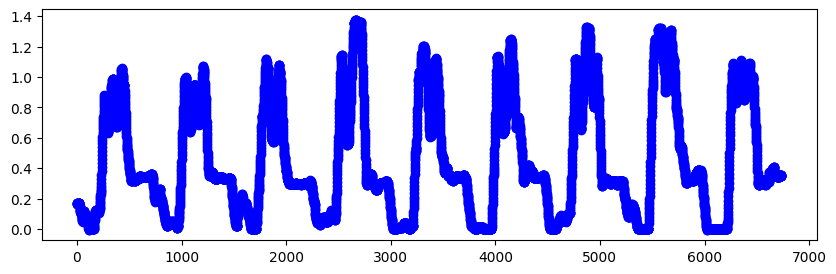

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import uniform_filter1d

# Example data for 100 time steps
array1 = slopes  # Replace with your actual data

# Smoothing the data using a moving average
window_size = 50  # Adjust the window size for smoothing effect
smooth_array = uniform_filter1d(array1, size=window_size)

# Array of specific time points you want to highlight
highlight_points = drifts  # Replace with your actual data

# Create x-values (indices) for the first array
time_steps = range(len(array1))

# Plot the smoothed main array
plt.figure(figsize=(10, 3))
plt.plot(time_steps, smooth_array, linestyle='-', marker='o', color='b', label='Smoothed Time Series Data')

# Highlight the specific time points from the second array
plt.scatter(highlight_points, [smooth_array[i] for i in highlight_points], color='r', zorder=5, label='Highlighted Points')

# Adding labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Smoothed Time Series with Highlighted Points')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Threshold for highlighting based on smoothed data
threshold = -1

# Calculate the differences between consecutive points
differences = [smooth_array[i] - smooth_array[i-1] for i in range(1, len(smooth_array))]

# Identify indices where the difference exceeds the threshold and values are greater than the threshold
highlight_diff_points = [i for i, diff in enumerate(differences, start=1) if abs(diff) > threshold and smooth_array[i] > threshold]

# Create y-values for the highlighted points above the threshold
highlighted_values = [smooth_array[i] for i in highlight_diff_points]

# Create a new plot to show only the highlighted points
plt.figure(figsize=(10, 3))

# Plot only the highlighted points without connecting lines
plt.scatter(highlight_diff_points, highlighted_values, color='g', zorder=5, label='Threshold Exceed Points', marker='o')

# Set x-axis to cover the entire length of the array
plt.xlim(0, len(array1) - 1)

# Adding labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Smoothed Highlighted Points Exceeding Threshold')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [16]:
len(slopes)

6737

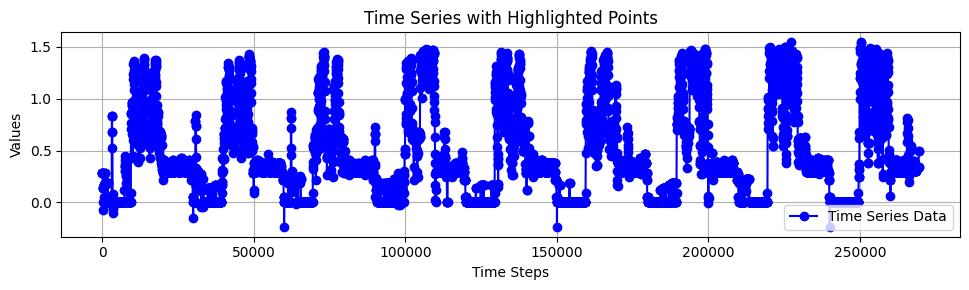

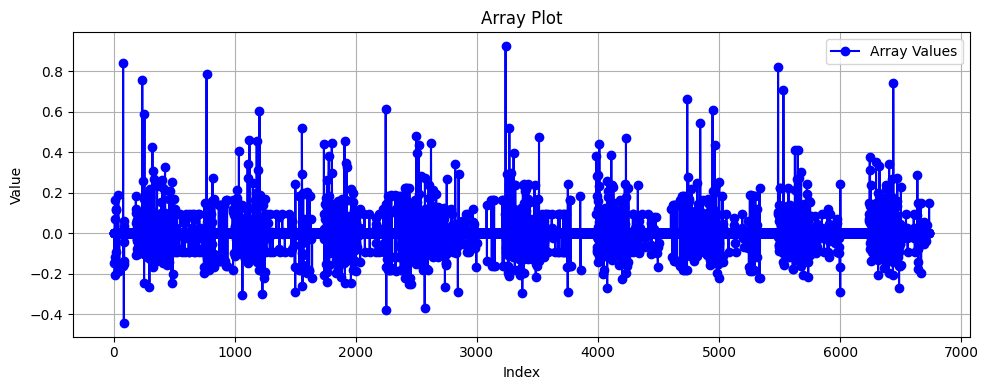

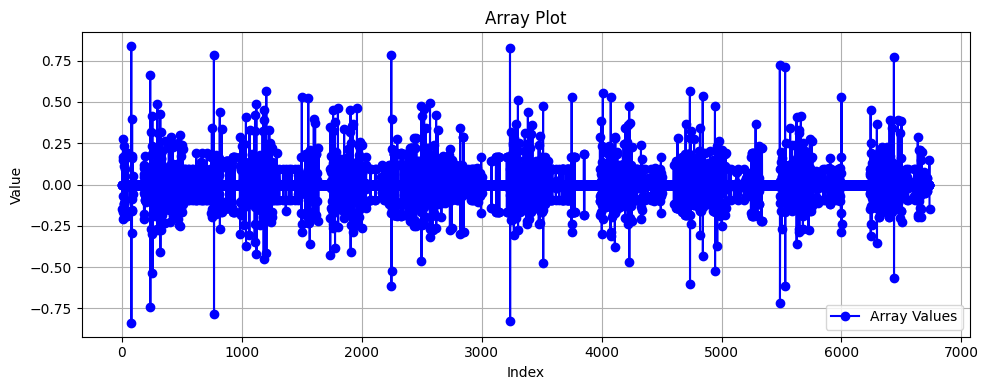

In [71]:
array1 = slopes  # Example data for 100 time steps

# Create the second array by taking every 10th element from the original array
# second_array = array1[::100]
second_array = array1

# Create x-values for the second array that correspond to the original 1000 points
x_values = [i * 40 for i in range(len(second_array))]

# # Plot the second array with x-axis corresponding to the original 1000 points
# plt.figure(figsize=(10, 4))
# plt.plot(x_values, second_array, marker='o', linestyle='-', color='b', label='Downsampled Array')
# plt.xlabel('Original Time Steps (0 to 1000)')
# plt.ylabel('Values')
# plt.title('Downsampled Array with Corresponding Original Time Steps')
# plt.grid(True)
# plt.legend()

# # Show the plot
# plt.show()


# Array of specific time points you want to highlight
highlight_points = drifts

# Create x-values (indices) for the first array
time_steps = range(len(array1))

# Plot the main array
plt.figure(figsize=(10, 3))
plt.plot(x_values, second_array, linestyle='-', marker='o', color='b', label='Time Series Data')

# Highlight the specific time points from the second array
# plt.scatter(highlight_points, [array1[i] for i in highlight_points], color='r', zorder=5, label='Highlighted Points')

# Adding labels and title
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Time Series with Highlighted Points')
# plt.grid(True)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('slopes.jpg', format='jpg')
plt.show()


threshold = 0.32
# Calculate the differences between consecutive points
# Calculate the differences between consecutive points
differences = [array1[i] - array1[i-1] for i in range(1, len(array1))]
differences_2 = [differences[i] - differences[i-1] for i in range(1, len(differences))]

# Identify indices where the difference exceeds the threshold and values are greater than the threshold
highlight_diff_points = [i for i, diff in enumerate(differences, start=1) if abs(diff) > threshold and array1[i] > threshold]

# Create y-values for the highlighted points above the threshold
highlighted_values = [array1[i] for i in highlight_diff_points]

# Create a new plot to show only the highlighted points
# plt.figure(figsize=(10, 3))

# # Plot only the highlighted points without connecting lines
# plt.scatter(highlight_diff_points, highlighted_values, color='g', zorder=5, label='Threshold Exceed Points', marker='o')

# # Set x-axis to cover the entire length of the array
# indices = range(len(differences))
indices = range(len(differences))
# Plot the array
plt.figure(figsize=(10, 4))
plt.plot(indices, differences, marker='o',  color='b', label='Array Values')
# plt.scatter(highlight_points, [array1[i] for i in highlight_points], color='r', zorder=5, label='Highlighted Points')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Array Plot')
# plt.grid(True)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('difference_1.jpg', format='jpg')
plt.show()

indices = range(len(differences_2))
# Plot the array
plt.figure(figsize=(10, 4))
plt.plot(indices, differences_2, marker='o',  color='b', label='Array Values')
# plt.scatter(highlight_points, [array1[i] for i in highlight_points], color='r', zorder=5, label='Highlighted Points')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Array Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('differnce_2.jpg', format='jpg')
plt.show()

In [72]:
differences_new = [differences[i] for i in range(len(differences)) if abs(differences[i])>0.4]
differences_new_index = [i*40 for i in range(len(differences)) if abs(differences[i])>0.4]

In [63]:
differences_new_2 = [differences_2[i] for i in range(len(differences_2)) if abs(differences_2[i])>0.35]
differences_new_index_2 = [i*40 for i in range(len(differences_2)) if abs(differences_2[i])>0.35]

C:\Users\Morteza\AppData\Local\Temp\ipykernel_15560\3884346765.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


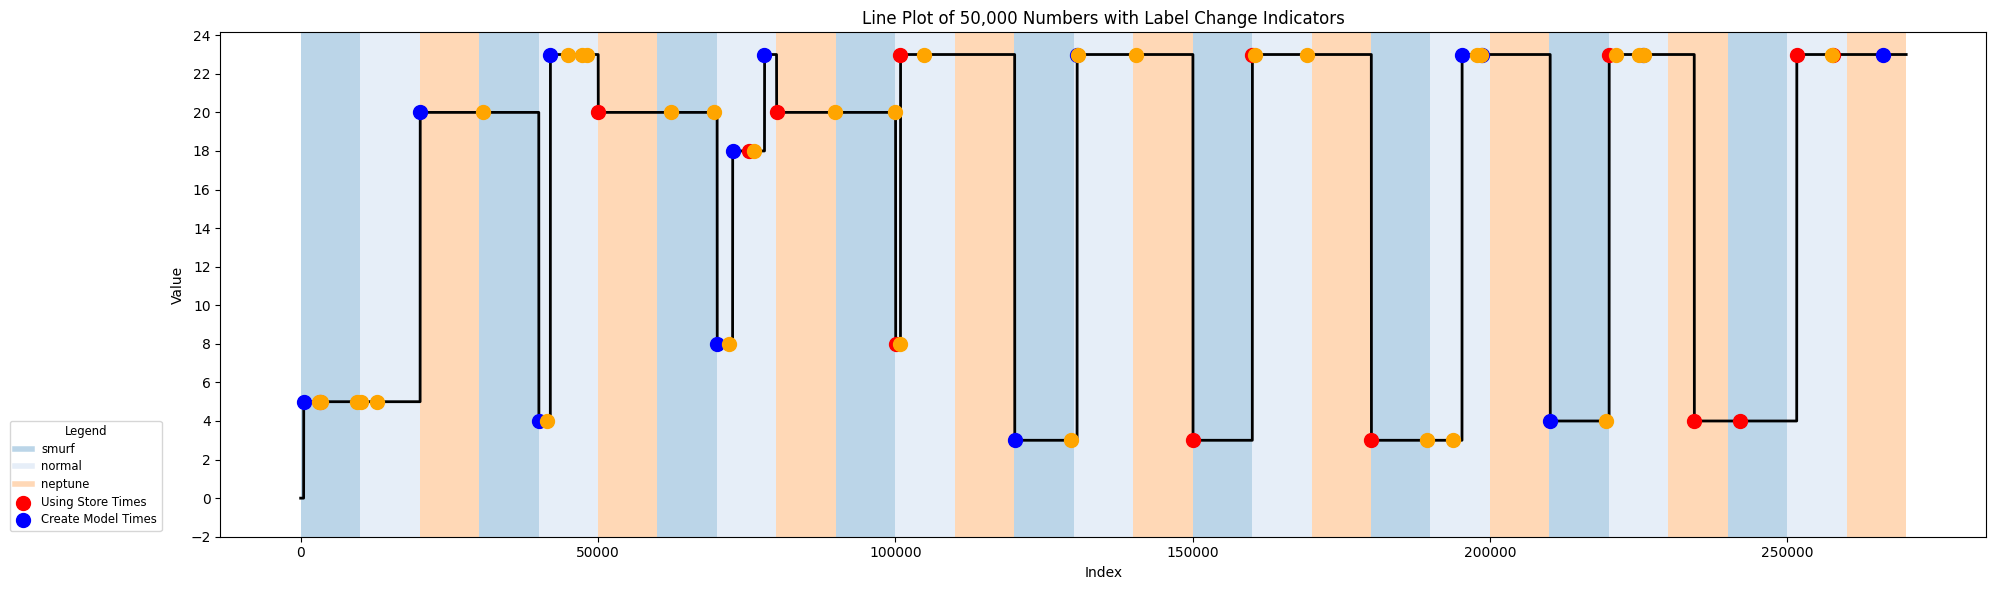

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels]

# Add red big dots for using_store_times
red_dots = plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
                       color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
blue_dots = plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
                        color='blue', s=100, label='Create Model Times', zorder=5)

orange_dots = plt.scatter(differences_new_index, [numbers_of_clusters[i] for i in differences_new_index], 
                        color='orange', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
legend_handles.extend([red_dots, blue_dots])

# Show combined legend
plt.legend(handles=legend_handles, title='Legend', loc='lower right',
              fontsize='small',
    title_fontsize='small',
    labelspacing=0.4, 
    handlelength=1.5 ,
          bbox_to_anchor=(-0.03, 0)) 
y_min, y_max = plt.ylim()  # Get current y-axis limits
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))  # Set y-ticks from min to max with step of 2


plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15560\2101437020.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


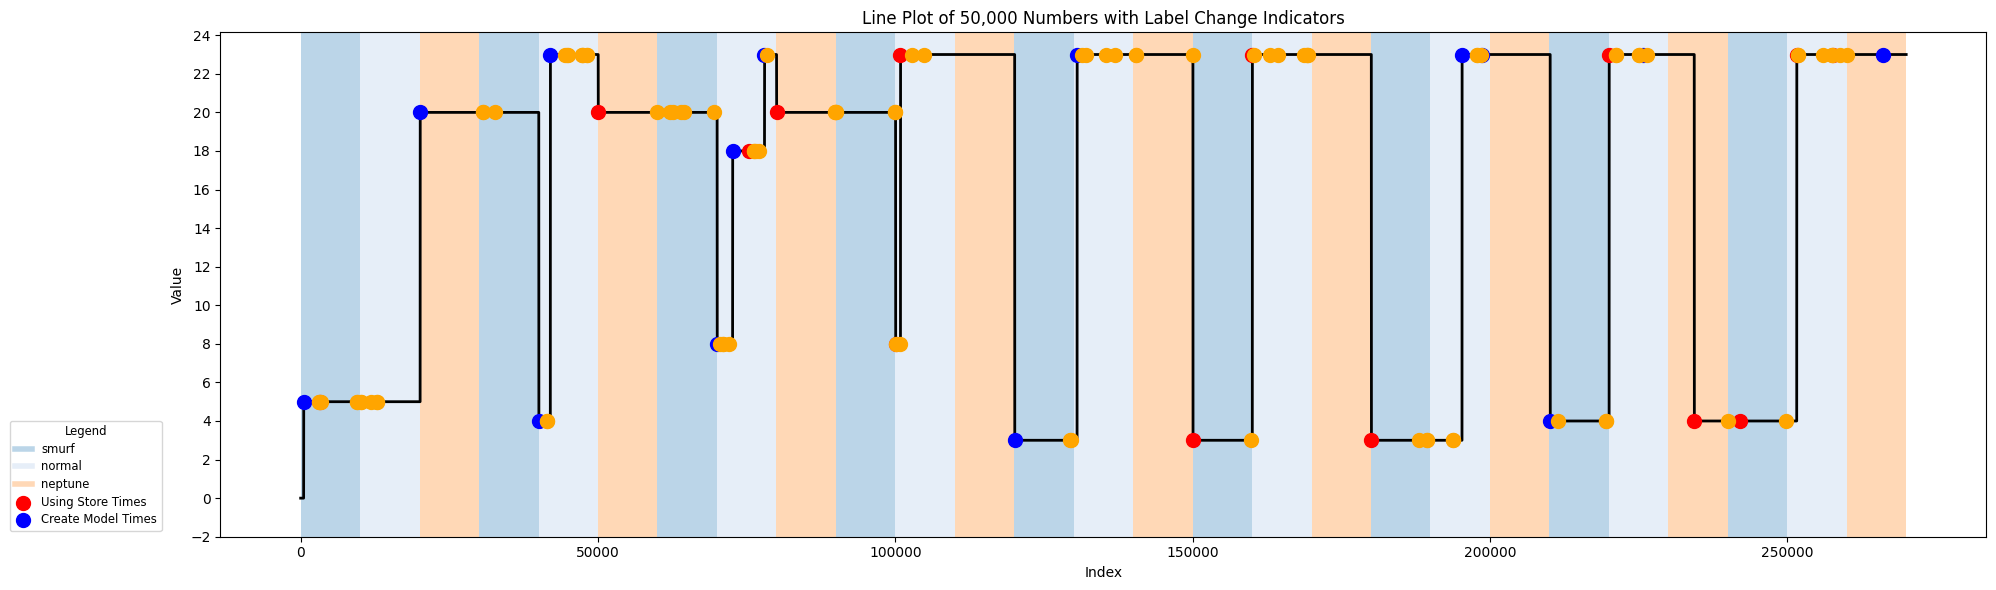

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels]

# Add red big dots for using_store_times
red_dots = plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
                       color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
blue_dots = plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
                        color='blue', s=100, label='Create Model Times', zorder=5)

orange_dots = plt.scatter(differences_new_index_2, [numbers_of_clusters[i] for i in differences_new_index_2], 
                        color='orange', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
legend_handles.extend([red_dots, blue_dots])

# Show combined legend
plt.legend(handles=legend_handles, title='Legend', loc='lower right',
              fontsize='small',
    title_fontsize='small',
    labelspacing=0.4, 
    handlelength=1.5 ,
          bbox_to_anchor=(-0.03, 0)) 
y_min, y_max = plt.ylim()  # Get current y-axis limits
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))  # Set y-ticks from min to max with step of 2


plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels]

# Add red big dots for using_store_times
red_dots = plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
                       color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
blue_dots = plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
                        color='blue', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
legend_handles.extend([red_dots, blue_dots])

# Show combined legend
plt.legend(handles=legend_handles, title='Legend', loc='lower right',
              fontsize='small',
    title_fontsize='small',
    labelspacing=0.4, 
    handlelength=1.5 ,
          bbox_to_anchor=(-0.03, 0)) 
y_min, y_max = plt.ylim()  # Get current y-axis limits
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))  # Set y-ticks from min to max with step of 2


plt.grid(False)
plt.tight_layout()
plt.savefig('changes_1.jpg', format='jpg')
plt.show()


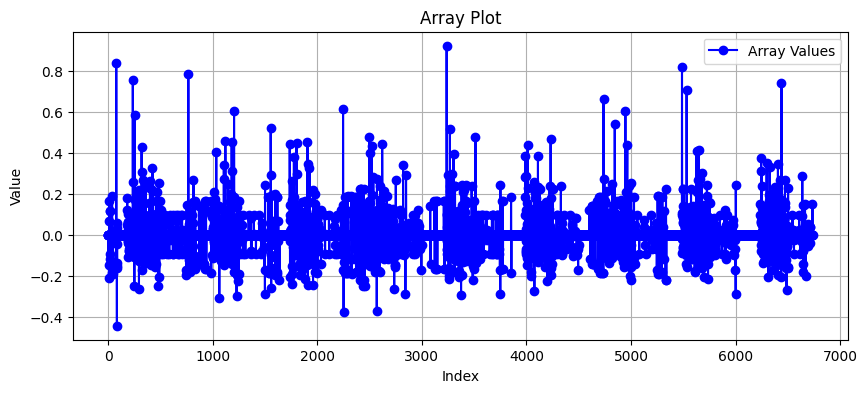

In [11]:
indices = range(len(differences))

# Plot the array
plt.figure(figsize=(10, 4))
plt.plot(indices, differences, marker='o',  color='b', label='Array Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Array Plot')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
differences

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.14728401584791145,
 0.0,
 0.0,
 0.0,
 -0.20917245725669076,
 0.06878956708410489,
 0.0,
 0.0,
 0.1651365310523999,
 0.0,
 0.0,
 -0.11691591062302314,
 0.11691591062302314,
 0.0,
 0.0,
 0.114387839436137,
 0.0,
 0.0,
 -0.09497868168632628,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.18454568880221062,
 0.0,
 0.0,
 0.0,
 0.0,
 0.18918118968250033,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.18918118968250033,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8376244129786661,
 0.0,
 0.0,
 -0.16067132272702633,
 0.0,
 -0.15162513304174707,
 -0.44375266075177655,
 -0.04597387924380276,
 -0.13631804534451475,
 0.03415980571066343,
 0.008302401773001657,
 0.05825442064653633,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [22]:
differences_new_index

[79,
 237,
 255,
 768,
 1205,
 1555,
 2247,
 3237,
 3268,
 4737,
 4844,
 4946,
 5487,
 5531,
 6438]

In [28]:
label_column = label_column
hange_indices = label_column.ne(label_column.shift())  # Finds where the label changes

# Get the indices and corresponding labels where the changes occur
start_indices = label_column.index[hange_indices]
labels_at_changes = label_column[hange_indices]

# Combine indices and labels into a DataFrame
result = pd.DataFrame({'Index': start_indices, 'Label': labels_at_changes})

# If you have a label dictionary and want to map numeric labels to their string representation
# Assuming label_dict contains the mapping from numbers to label names
result['Label_Name'] = result['Label'].map(label_dict_old)


In [25]:
preprocessed_data.max()

PC1      1.0
PC2      1.0
PC3      1.0
label    1.0
dtype: float64

In [26]:
len(numbers_of_clusters)

269999

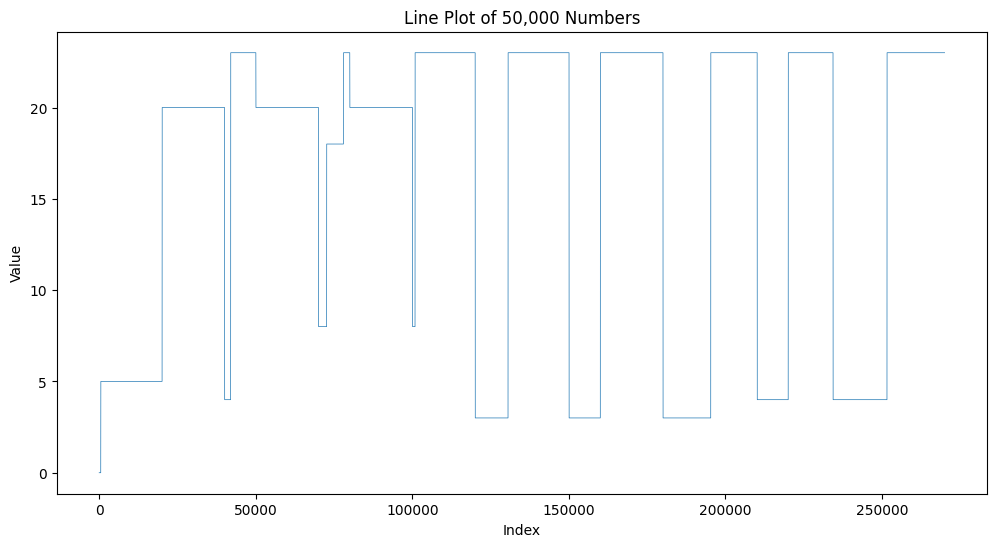

In [27]:
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
plt.plot(numbers_of_clusters, linewidth=0.5)  # Plot with a smaller line width
plt.title('Line Plot of 50,000 Numbers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(False)
plt.show()

In [105]:
label_column = label_column
hange_indices = label_column.ne(label_column.shift())  # Finds where the label changes

# Get the indices and corresponding labels where the changes occur
start_indices = label_column.index[hange_indices]
labels_at_changes = label_column[hange_indices]

# Combine indices and labels into a DataFrame
result = pd.DataFrame({'Index': start_indices, 'Label': labels_at_changes})

# If you have a label dictionary and want to map numeric labels to their string representation
# Assuming label_dict contains the mapping from numbers to label names
result['Label_Name'] = result['Label'].map(label_dict_old)


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15560\3453966617.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


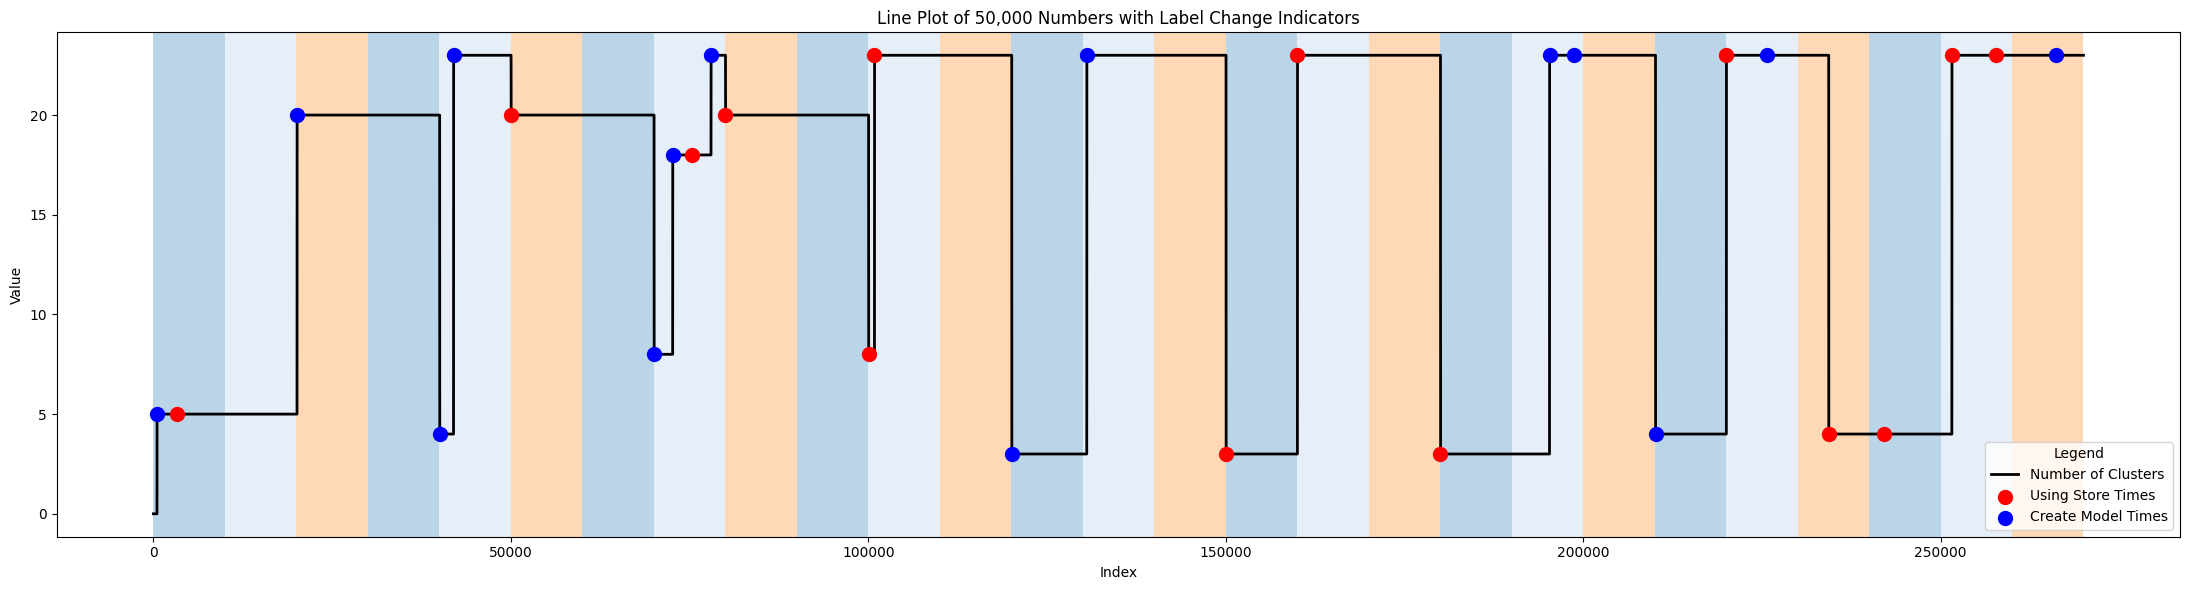

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(22, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=2, linestyle='-', alpha=0.3) for label in unique_labels]

# Add legend for the label types
plt.legend(legend_handles, unique_labels, title='Label Types', loc='upper right')

# Add red big dots for using_store_times
plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
            color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
            color='blue', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
plt.legend(title='Legend', loc='lower right')

plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()

C:\Users\Morteza\AppData\Local\Temp\ipykernel_17440\841576904.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


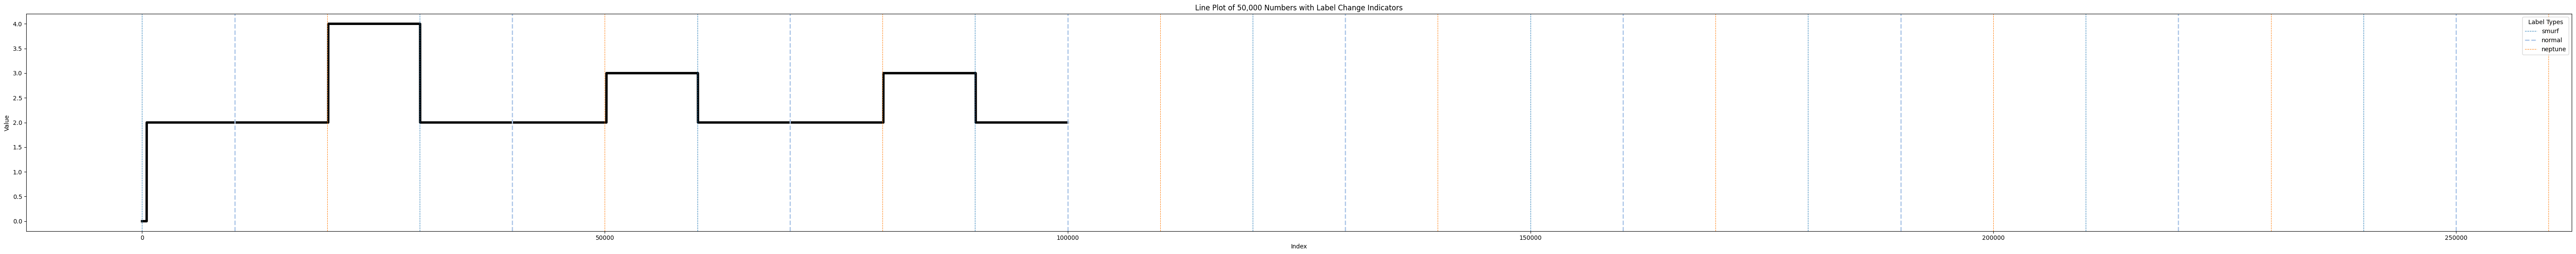

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(60, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=4, color="black", label='Number of Clusters')  # Your main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Overlay the vertical dashed lines at the change points
lines = {}  # Dictionary to keep track of the line handles for the legend
for _, row in result.iterrows():
    # Draw dashed lines and store the line handle in lines dict for the first occurrence of each label
    line_width = 2 if row['Label_Name'] == 'normal' else 0.75  # Thicker lines for "normal"
    line = plt.axvline(x=row['Index'], linestyle='--', color=color_map[row['Label_Name']], linewidth=line_width)
    if row['Label_Name'] not in lines:
        lines[row['Label_Name']] = line  # Save the line handle for this label type

# Add legend for the label types using the line handles
plt.legend(lines.values(), lines.keys(), title='Label Types', loc='upper right')

plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


C:\Users\Morteza\AppData\Local\Temp\ipykernel_17440\1725502877.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


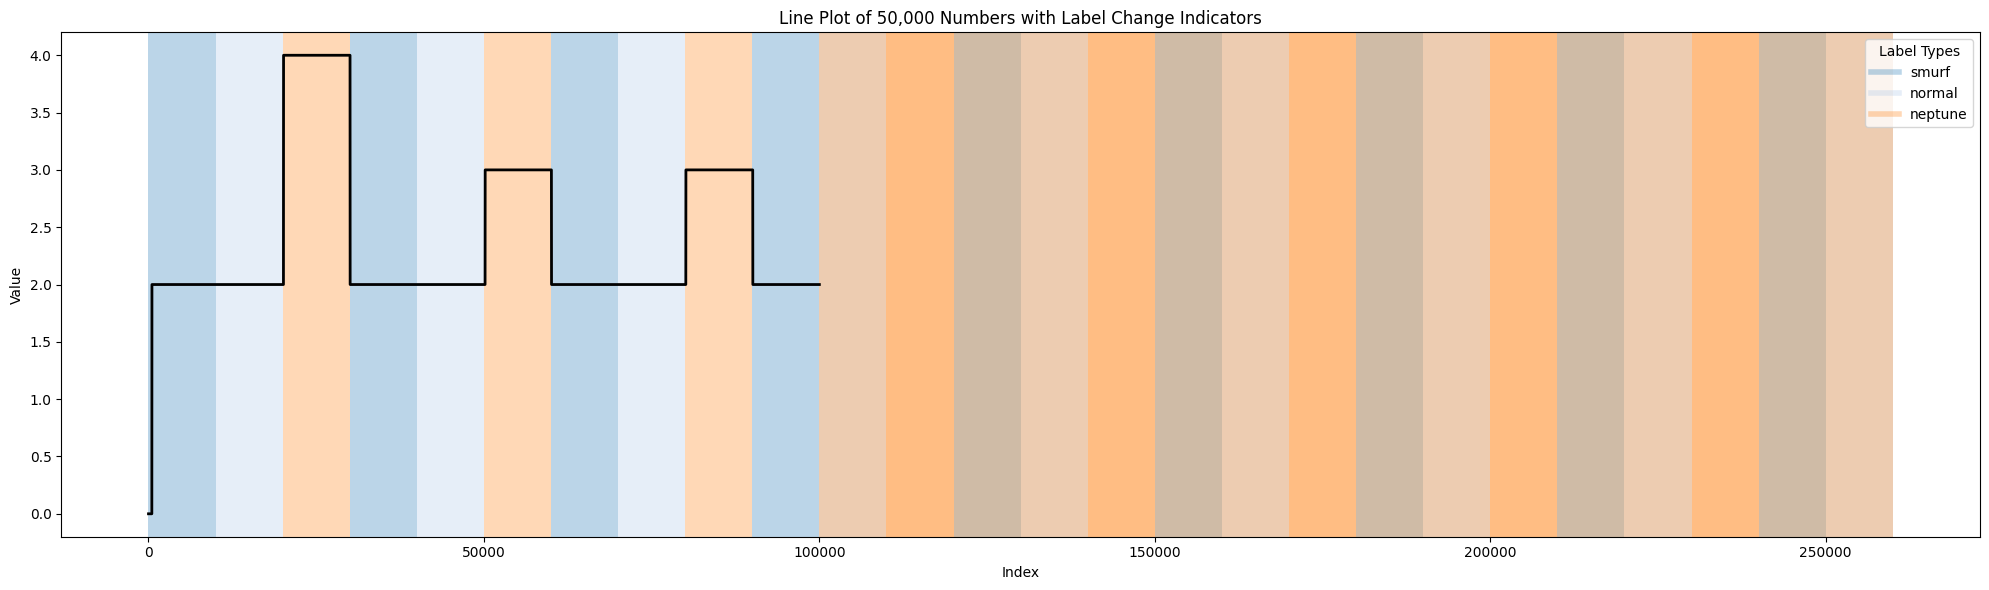

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3) for label in unique_labels]

# Add legend for the label types
plt.legend(legend_handles, unique_labels, title='Label Types', loc='upper right')

plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


C:\Users\Morteza\AppData\Local\Temp\ipykernel_15560\2520002406.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}


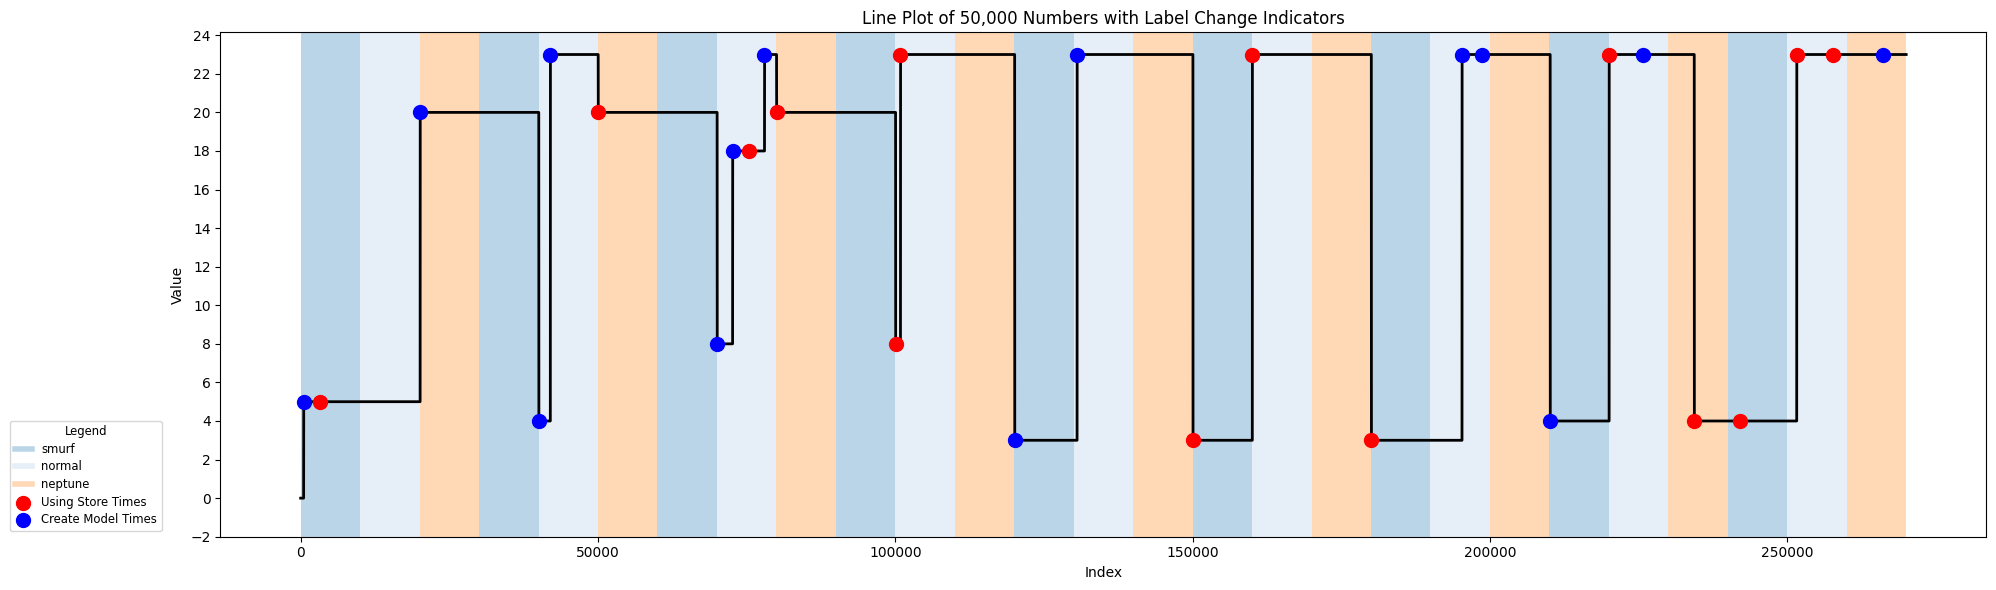

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color mapping for each label type using the unique label names
unique_labels = result['Label_Name'].unique()
color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}

# Plot the existing data
plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
plt.xlabel('Index')
plt.ylabel('Value')

# Add colored background regions based on label changes
prev_index = result['Index'].iloc[0]  # Start from the first index
prev_label = result['Label_Name'].iloc[0]  # Start from the first label

for i in range(1, len(result)):
    current_index = result['Index'].iloc[i]
    current_label = result['Label_Name'].iloc[i]
    
    # Add a shaded area between the previous and current indices
    plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
    
    # Update previous index and label for the next iteration
    prev_index = current_index
    prev_label = current_label

# Add the last span from the last change point to the end of the plot
plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)

# Create legend handles manually for the label types
legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels]

# Add red big dots for using_store_times
red_dots = plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
                       color='red', s=100, label='Using Store Times', zorder=5)

# Add blue big dots for create_model_times
blue_dots = plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
                        color='blue', s=100, label='Create Model Times', zorder=5)

# Update legend to include the new dots
legend_handles.extend([red_dots, blue_dots])

# Show combined legend
plt.legend(handles=legend_handles, title='Legend', loc='lower right',
              fontsize='small',
    title_fontsize='small',
    labelspacing=0.4, 
    handlelength=1.5 ,
          bbox_to_anchor=(-0.03, 0)) 
y_min, y_max = plt.ylim()  # Get current y-axis limits
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))  # Set y-ticks from min to max with step of 2


plt.grid(False)
plt.tight_layout()
plt.savefig('changes.jpg', format='jpg')
plt.show()


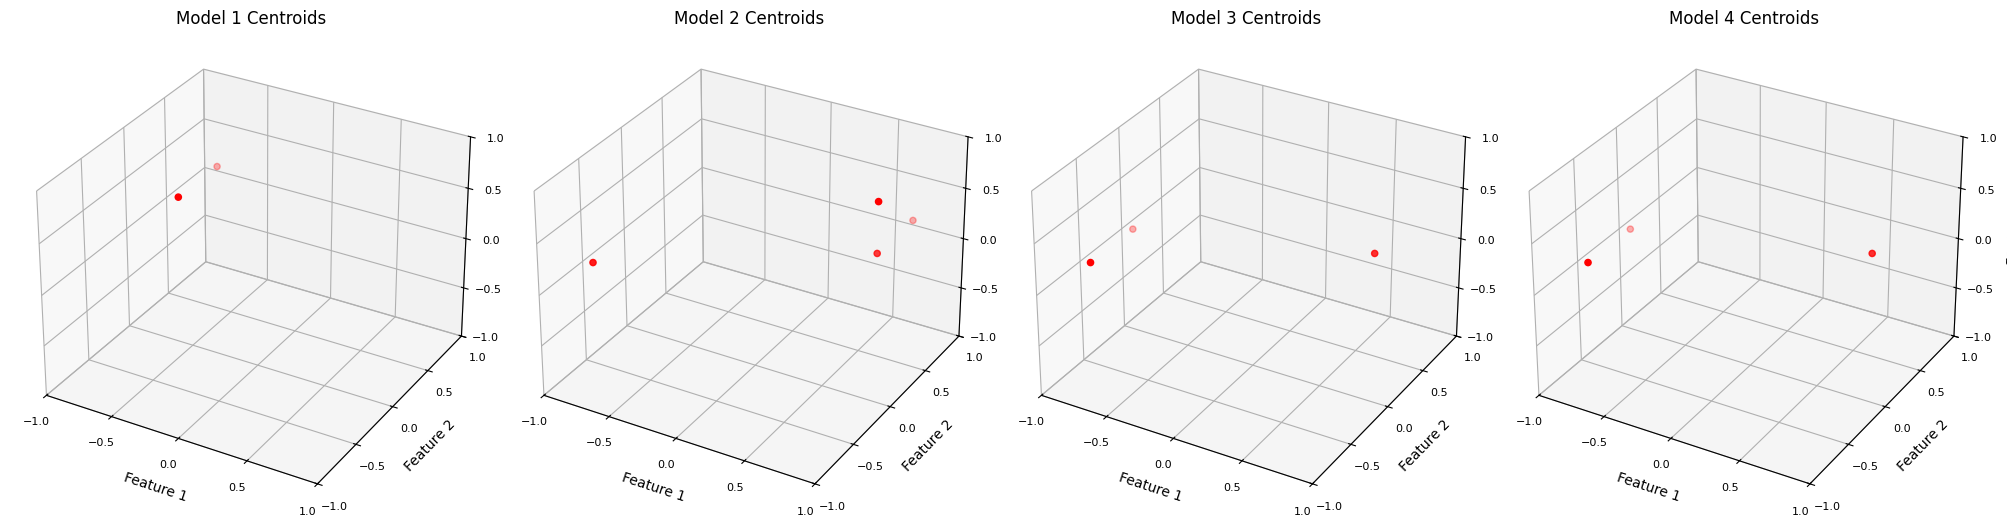

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `models` is your list of models with centroids
num_models = len(models)
cols = 6
rows = (num_models + cols - 1) // cols  # Calculate the number of rows needed

fig = plt.figure(figsize=(5 * cols, 6 * rows))
axs = [fig.add_subplot(rows, cols, i + 1, projection='3d') for i in range(num_models)]

for idx, ax in enumerate(axs):
    model = models[idx]
    centroids = np.array([cluster.centroid for cluster in model.clusters])
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', color='r')
    ax.set_title(f'Model {idx + 1} Centroids')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    
    # Set all three dimensions (x, y, z) to range between -1 and 1
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

    # Reduce the number of ticks on each axis
    ax.set_xticks(np.linspace(-1, 1, 5))  # Fewer ticks
    ax.set_yticks(np.linspace(-1, 1, 5))
    ax.set_zticks(np.linspace(-1, 1, 5))
    
    # Adjust tick parameters: reduce label size and increase padding
    ax.tick_params(axis='x', labelsize=8, pad=3)  # Smaller font size and padding
    ax.tick_params(axis='y', labelsize=8, pad=3)
    ax.tick_params(axis='z', labelsize=8, pad=3)

# Adjust deletion of axes to ensure no out of range errors
if num_models < rows * cols:
    for ax in axs[num_models:]:  # Get the unused axes from the list
        fig.delaxes(ax)  # Properly delete unused axes

plt.tight_layout()
plt.savefig('cluster_centroids.jpg', format='jpg')
plt.show()


Creating initial model.
[(0, 3, 2)]
Alarm: Concept drift detected
------------------------------------------------------------ di 0.28753272921639594 -50.00016446360743 0.001
match_percentage:  0.9942305280321083
Matching model found. Reusing the model.
Alarm: Concept drift detected
------------------------------------------------------------ di 1.7531131653581733 50.16466765643383 0.001
match_percentage:  0.0
15
Alarm: Concept drift detected
------------------------------------------------------------ di 1.1609640474436815 1000.2757955807621 0.001
Alarm: Concept drift detected
------------------------------------------------------------ di 0.0 -1000.112566273608 0.001
Alarm: Concept drift detected
------------------------------------------------------------ di 1.7477549997722284 50.0060386530808 0.00096391892749015
match_percentage:  0.0
Creating new model.
[(3, 2, 2)]
Alarm: Concept drift detected
------------------------------------------------------------ di 1.8616129651641826 50.5

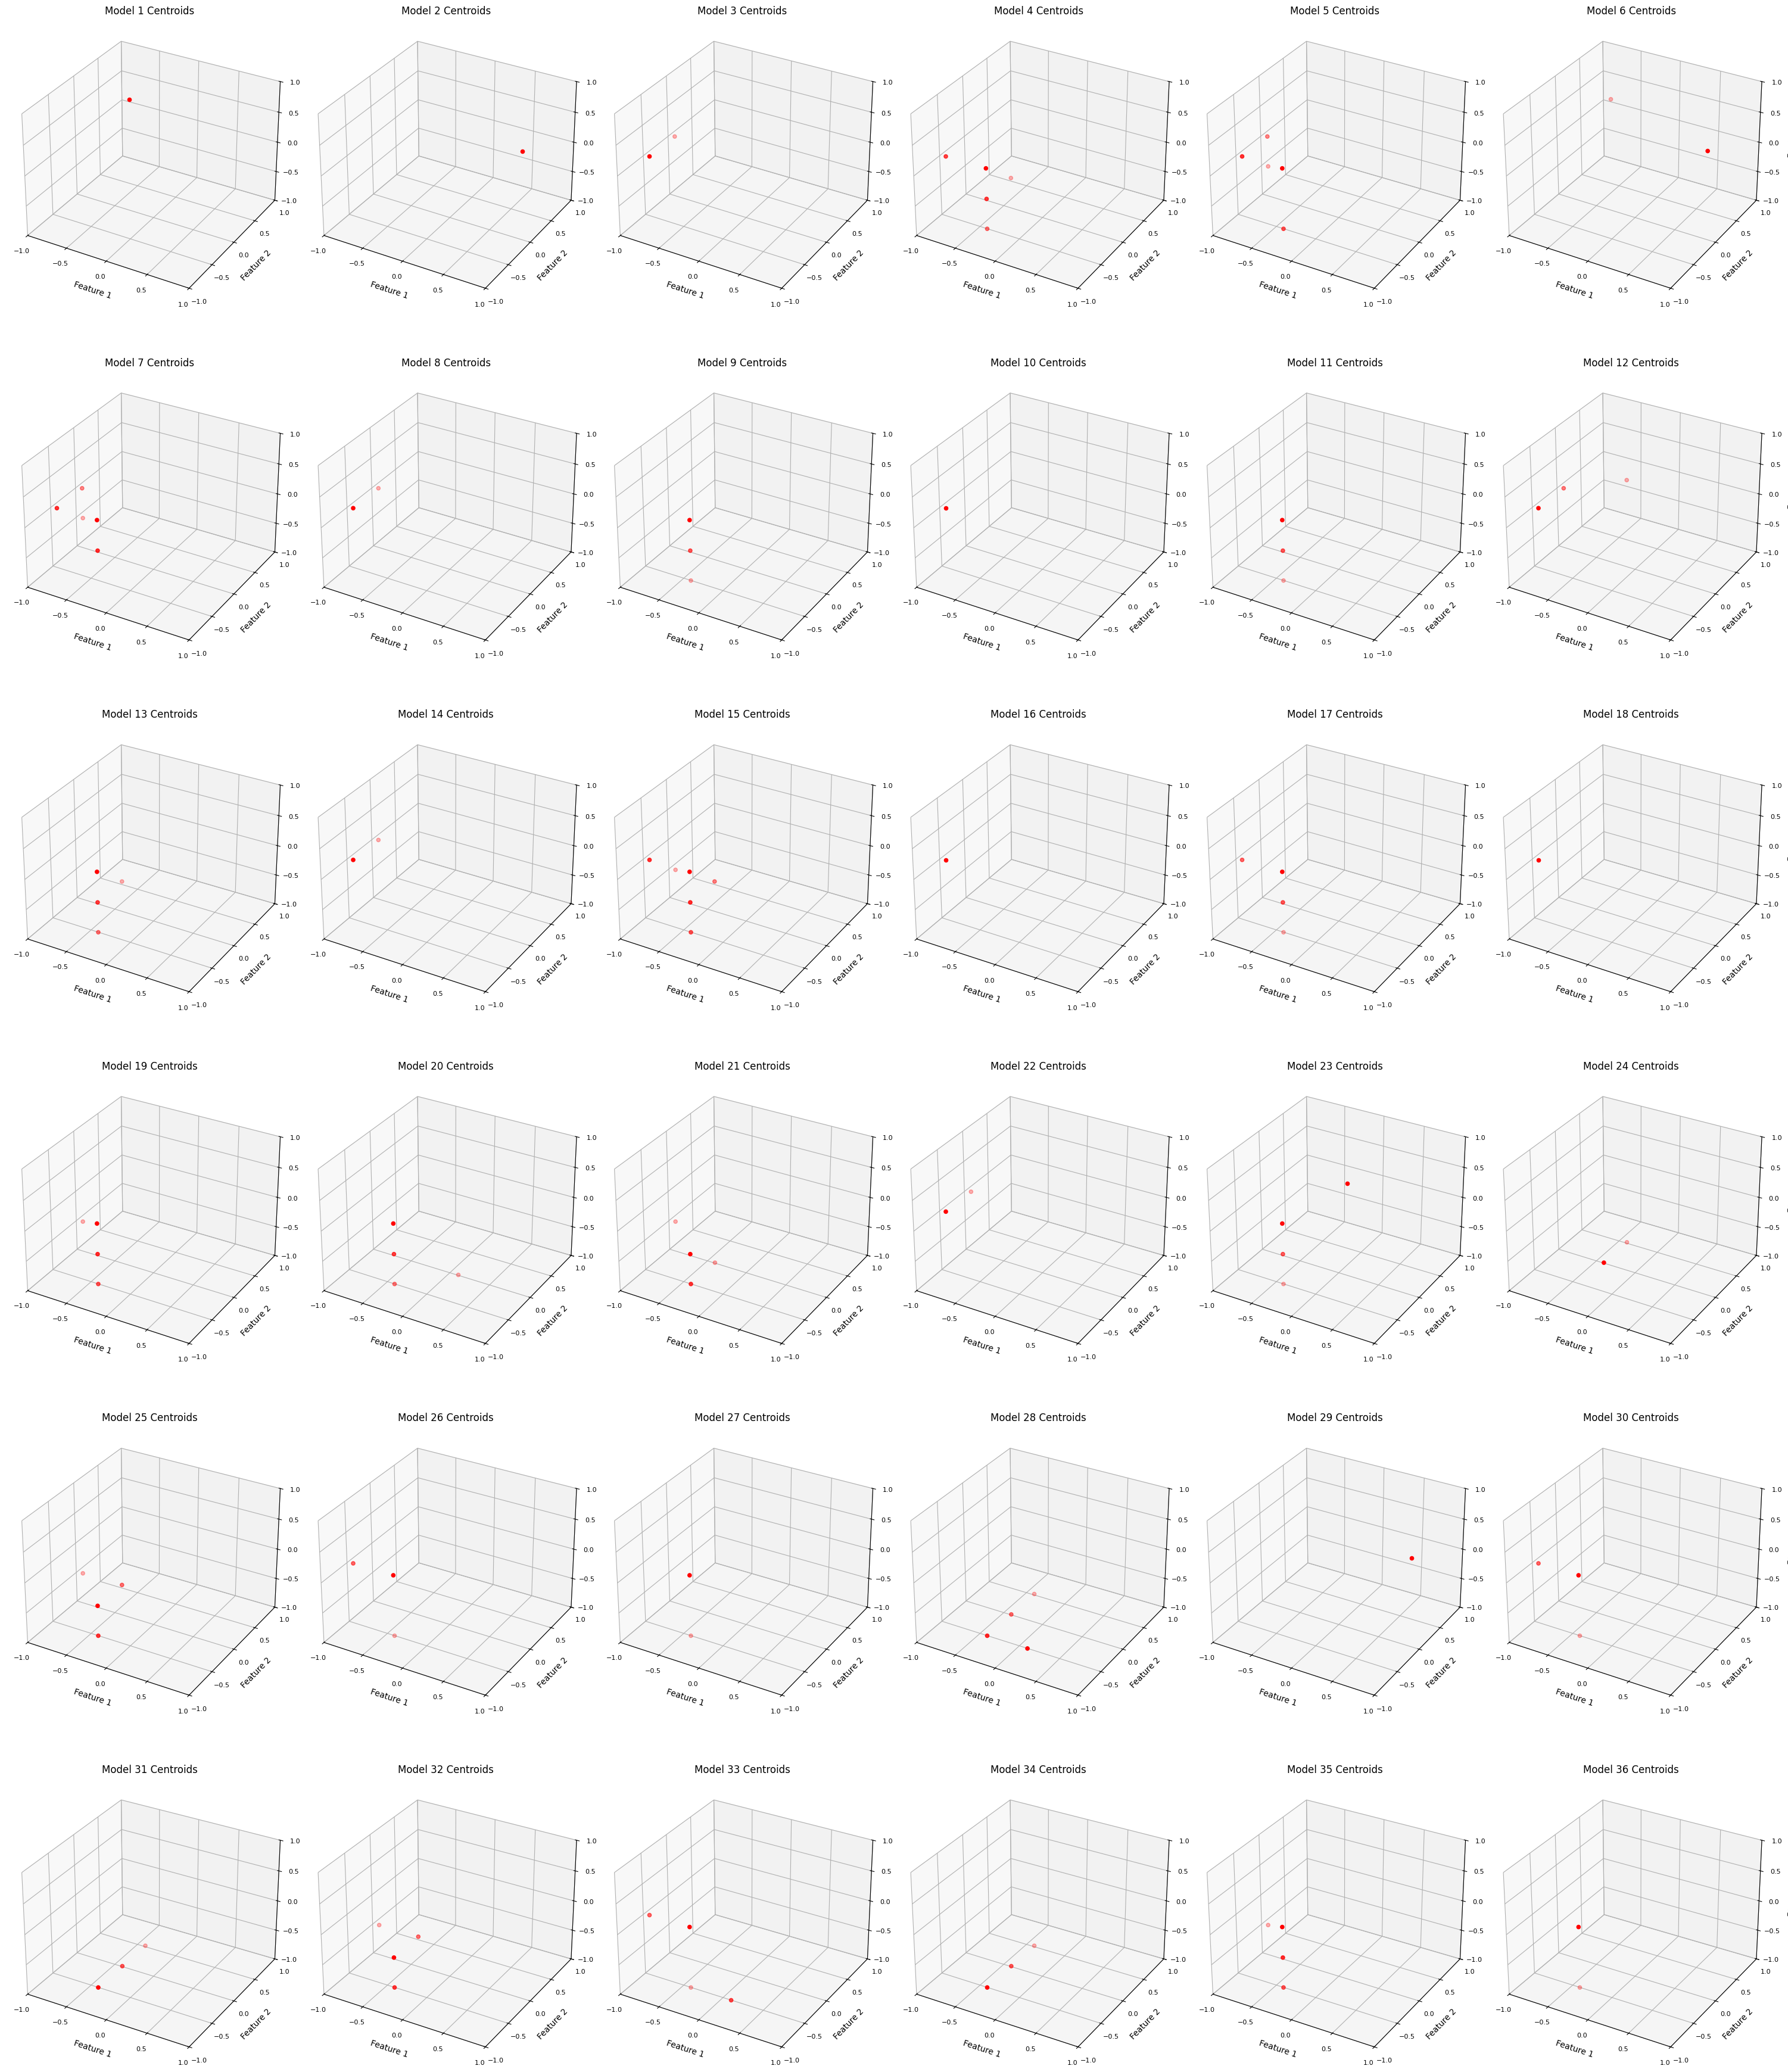

[-0.75  0.75  0.25]
[0.75 0.25 0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25  0.25]
[-0.75 -0.75  0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.25 -0.25 -0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25 -0.25]
[-0.75 -0.25  0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75  0.25]
[-0.75  0.75  0.25]
[0.75 0.25 0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25 -0.25]
[-0.75 -0.25  0.25]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25  0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.75 -0.75  0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25  0.25]
[-0.25  0.25  0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.25 -0.25 -0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25  0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.25 -0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.25 -0.25 -0.25]
[-0.75 -0.75  0.25]
[-0.75 -0.75  0.25]
[-0.25 -0.75 -0.75]
[-0.25 -0.75 -0.25]
[-0.25 -0.75  0.25]
[-0.75

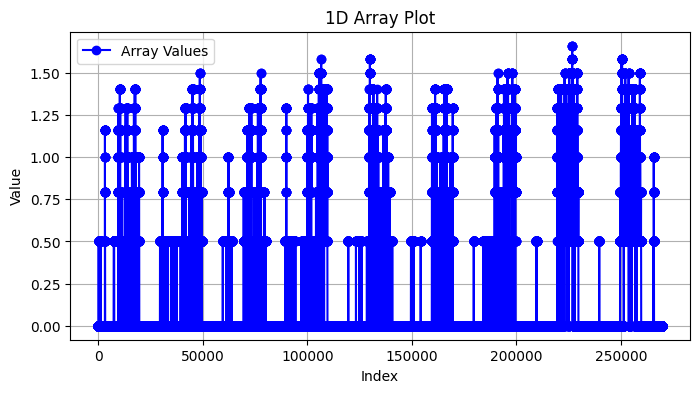

ValueError: too many values to unpack (expected 4)

In [111]:


import matplotlib.pyplot as plt
import numpy as np


preprocess = Preprocessing(r"H:\TemprorayCodes\Miss.Rezaei\data.csv")
data2, label_names = preprocess.run()


# Extract the label column from data2
label_column = data2.pop('label')

# Create a dictionary to map labels to their names
label_dict_old = {label: name for label, name in zip(label_column, label_names)}

# Map label names to the label column for filtering
data2['label'] = label_column
data2['label_names'] = label_column.map(label_dict_old)

# Filter the data to keep only rows where label_names are "normal", "neptune", or "smurf"
filtered_data = data2[data2['label_names'].isin(["normal", "neptune", "smurf"])]
# filtered_data = data2

normal_data = filtered_data[filtered_data['label_names'] == "normal"]
neptune_data = filtered_data[filtered_data['label_names'] == "neptune"]
smurf_data = filtered_data[filtered_data['label_names'] == "smurf"]

# Create function to batch data in cycles of 10,000
def create_cycled_batches(normal_data, neptune_data, smurf_data, batch_size=10000):
    # Calculate the minimum length that can be divided into batches
    min_length = min(len(normal_data), len(neptune_data), len(smurf_data))
    total_batches = min_length // batch_size
    
    # Collect batches
    batches = []
    for i in range(total_batches):
        batches.append(smurf_data[i * batch_size:(i + 1) * batch_size])
        batches.append(normal_data[i * batch_size:(i + 1) * batch_size])
        batches.append(neptune_data[i * batch_size:(i + 1) * batch_size])
 
    
    # Concatenate all batches
    return pd.concat(batches).reset_index(drop=True)

# Create cycled batches
cycled_data = create_cycled_batches(normal_data, neptune_data, smurf_data)

filtered_data = cycled_data

label_column = filtered_data["label"]

# Preprocess the filtered data
preprocessed_data = preprocess_data(
    filtered_data.drop(columns=['label_names']), 
    sample_size=10000, 
    standardize=True, 
    reduce_dim=True, 
    n_components=3
)
preprocessed_data = pd.DataFrame(preprocessed_data)

# Map the filtered label names to a binary classification
label_column_new = filtered_data['label_names'].apply(lambda x: 0 if x == "normal" else 1)
preprocessed_data['label'] = label_column_new

# Update the label dictionary to reflect the new classification
label_dict = {0: "normal", 1: "attack"}

# Uncomment if shuffling is required
# shuffled_data = preprocessed_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the number of labels and simulate the stream
number_of_labels = 23

for decay_factor in np.arange(0.95, 0.30, -0.05):
    models, numbers_of_clusters, using_store_times, create_model_times = simulate_stream(preprocessed_data, decay_factor=decay_factor, density_threshold=0.3, cluster_radius=0.3, grid_size=0.5, test_phase=decay_factor, numberOfLabels=number_of_labels)
    # density_threshold, cluster_radious, grid_size, test_phase,
    
    
    label_column = label_column
    hange_indices = label_column.ne(label_column.shift())  # Finds where the label changes
    
    # Get the indices and corresponding labels where the changes occur
    start_indices = label_column.index[hange_indices]
    labels_at_changes = label_column[hange_indices]
    
    # Combine indices and labels into a DataFrame
    result = pd.DataFrame({'Index': start_indices, 'Label': labels_at_changes})
    
    # If you have a label dictionary and want to map numeric labels to their string representation
    # Assuming label_dict contains the mapping from numbers to label names
    result['Label_Name'] = result['Label'].map(label_dict_old)
    
    
    
    # Define the color mapping for each label type using the unique label names
    unique_labels = result['Label_Name'].unique()
    color_map = {label: plt.cm.get_cmap('tab20')(i) for i, label in enumerate(unique_labels)}
    
    # Plot the existing data
    plt.figure(figsize=(20, 6))  # Increase the width of the figure for better visibility
    plt.plot(numbers_of_clusters, linewidth=2, color="black", label='Number of Clusters')  # Main plot
    plt.title('Line Plot of 50,000 Numbers with Label Change Indicators')
    plt.xlabel('Index')
    plt.ylabel('Value')
    
    # Add colored background regions based on label changes
    prev_index = result['Index'].iloc[0]  # Start from the first index
    prev_label = result['Label_Name'].iloc[0]  # Start from the first label
    
    for i in range(1, len(result)):
        current_index = result['Index'].iloc[i]
        current_label = result['Label_Name'].iloc[i]
        
        # Add a shaded area between the previous and current indices
        plt.axvspan(prev_index, current_index, facecolor=color_map[prev_label], alpha=0.3)  # Use alpha for transparency
        
        # Update previous index and label for the next iteration
        prev_index = current_index
        prev_label = current_label
    
    # Add the last span from the last change point to the end of the plot
    plt.axvspan(prev_index, len(numbers_of_clusters), facecolor=color_map[prev_label], alpha=0.3)
    
    # Create legend handles manually for the label types
    legend_handles = [plt.Line2D([0], [0], color=color_map[label], lw=4, linestyle='-', alpha=0.3, label=label) for label in unique_labels]
    
    # Add red big dots for using_store_times
    red_dots = plt.scatter(using_store_times, [numbers_of_clusters[i] for i in using_store_times], 
                           color='red', s=100, label='Using Store Times', zorder=5)
    
    # Add blue big dots for create_model_times
    blue_dots = plt.scatter(create_model_times, [numbers_of_clusters[i] for i in create_model_times], 
                            color='blue', s=100, label='Create Model Times', zorder=5)
    
    # Update legend to include the new dots
    legend_handles.extend([red_dots, blue_dots])
    
    # Show combined legend
    plt.legend(handles=legend_handles, title='Legend', loc='lower right',
                  fontsize='small',
        title_fontsize='small',
        labelspacing=0.4, 
        handlelength=1.5 ,
              bbox_to_anchor=(-0.03, 0)) 
    y_min, y_max = plt.ylim()  # Get current y-axis limits
    plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))  # Set y-ticks from min to max with step of 2
    
    
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f'changes_{decay_factor}.jpg', format='jpg')
    plt.show()


